In [2]:
import numpy as np
import NN_Ian 
import read_files
import importlib
import matplotlib.pyplot as plt
import random
import Test

In [80]:
importlib.reload(NN_Ian)
importlib.reload(read_files)
importlib.reload(Test)

<module 'Test' from '/Users/ijones1/Documents/Final_Project_Skeleton/scripts/Test.py'>

In [35]:
inputs = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])
outputs = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])

In [36]:
NN = Test.dlnet(inputs, outputs)

60


In [37]:
NN.gd(inputs, outputs, iter = 10000)

TypeError: gd() missing 2 required positional arguments: 'test' and 'out'

In [38]:
NN.forward()

KeyError: 'W1'

read in negative and positive sequences

In [39]:
neg = read_files.getNeg()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
positive
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
positive
positive
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

In [50]:
pos = read_files.getPos()
pos = np.array(pos)

In [51]:
print(len(neg))
print(len(pos))

3107440
274


Convert pos and negative sequence using onehot

In [77]:
pos_future= np.random.choice(pos,54, replace=False)
len(pos_future)

54

In [78]:
pos_final =np.array([])
for x in pos:
    if x not in pos_future_test:
        pos_final = np.append(pos_final, x)
len(pos_final)

220

Get more sequence, by mutating the last bp...

In [185]:
mut_pos_final=Test.mutate(pos_final, 1)
print(len(mut_pos_final))
mut_pos_final=np.array(mut_pos_final)
mut_pos_final=(np.unique(mut_pos_final))
print(len(mut_pos_final))

3520
3488


In [115]:
neg

Seq('CTTCATGTCAGCCTGCA', SingleLetterAlphabet())

The following randomly selects sequences from the negative group equal to the positive groups

In [87]:
print(len(neg))
print(len(pos_future))
print(len(pos_final))
print(len(mut_pos_final))
neg_future_test, neg_final = Test.get_neg_test(neg, pos_future, mut_pos_final)

3107440
54
220
3488


In [86]:
print(len(neg_future_test))
print(len(neg_final))

54
3488


In [90]:
pos_fin_con = np.array(Test.convert(mut_pos_final))
pos_fut_con = np.array(Test.convert(pos_future_test))
neg_fin_con = np.array(Test.convert(neg_final))
neg_fut_con = np.array(Test.convert(neg_future_test))

In [91]:
print(len(pos_fin_con))
print(len(np.array(range(len(pos_fin_con)))))
print(len(pos_fut_con))
print(len(neg_fut_con))

3488
3488
54
54


Get sample to be tested later

In [176]:
Future = np.append(pos_fut_con, neg_fut_con, axis=0)
print(len(Future))
Future_output = np.repeat([1,0], 54)
print(len(Future_output))

108
108


In [177]:
rand = np.random.choice(range(len(pos_fin_con)),len(pos_fin_con), replace=False)
print(len(rand))
k1= []
k2= []
k3= []
k4= []
for x in range(len(rand)):
    if x < len(pos_fin_con)/4:
        i =rand[x]
        k1 += [pos_fin_con[i]]
        k1 += [neg_fin_con[i]]
    elif x < len(pos_fin_con)/2:
        i =rand[x]
        k2 += [pos_fin_con[i]]
        k2 += [neg_fin_con[i]]
    elif x < len(pos_fin_con)*3/4:
        i =rand[x]
        k3 += [pos_fin_con[i]]
        k3 += [neg_fin_con[i]]
    else:
        i =rand[x]
        k4 += [pos_fin_con[i]]
        k4 += [neg_fin_con[i]]

3488


In [178]:
k1 = np.array(k1)
# print(len(k1))
k2 = np.array(k2)
# print(len(k2))
k3 = np.array(k3)
k4 = np.array(k4)
x = len(k1)/2
# print(int(x))
output=np.tile([1,0],int(x)*3)
output=output.reshape((len(output)),1)
output.shape


(5232, 1)

In [131]:
importlib.reload(NN_Ian)
importlib.reload(read_files)
importlib.reload(Test)

<module 'Test' from '/Users/ijones1/Documents/Final_Project_Skeleton/scripts/Test.py'>

Get all the data for Kfolds processing

60
Cost after iteration 0: 0.753634
Cost after iteration 500: 0.004326
Cost after iteration 1000: 0.001643
Cost after iteration 1500: 0.000973
Cost after iteration 2000: 0.000681
Cost after iteration 2500: 0.000520


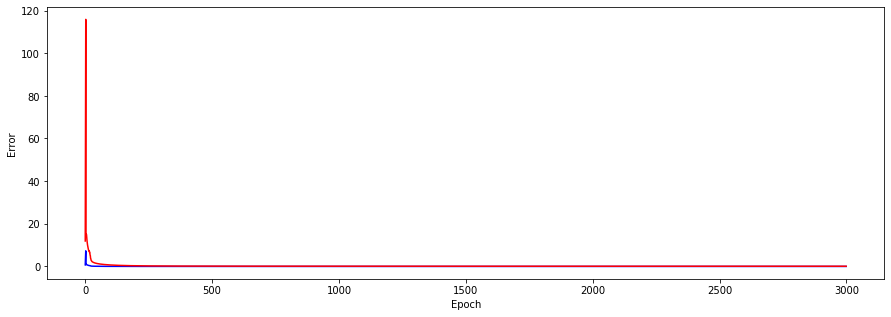

60
Cost after iteration 0: 0.753648
Cost after iteration 500: 0.004407
Cost after iteration 1000: 0.001714
Cost after iteration 1500: 0.001015
Cost after iteration 2000: 0.000708
Cost after iteration 2500: 0.000538


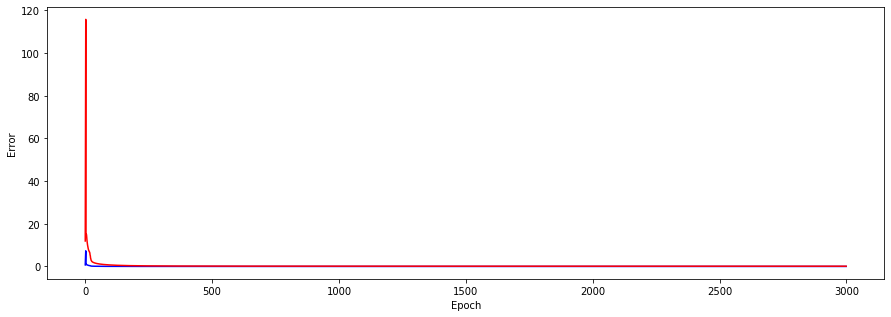

60
Cost after iteration 0: 0.752863
Cost after iteration 500: 0.004665
Cost after iteration 1000: 0.001861
Cost after iteration 1500: 0.001091
Cost after iteration 2000: 0.000757
Cost after iteration 2500: 0.000574


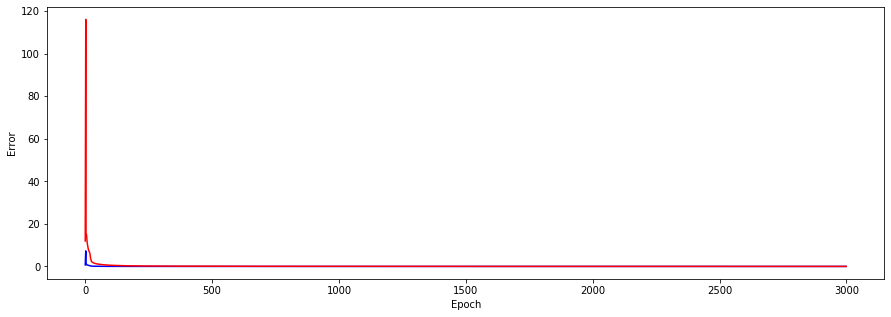

60
Cost after iteration 0: 0.753210
Cost after iteration 500: 0.004739
Cost after iteration 1000: 0.001835
Cost after iteration 1500: 0.001074
Cost after iteration 2000: 0.000745
Cost after iteration 2500: 0.000565


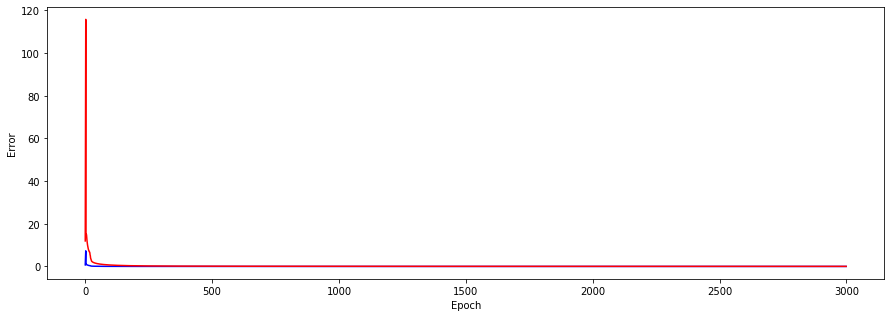

array([[0.06674298]])

In [119]:
Test.test_NN(k1,k2,k3,k4, output)

In [179]:
all_train = np.append(k1, k2, axis=0)
all_train = np.append(all_train, k3, axis=0)
all_train = np.append(all_train, k4, axis=0)
print(len(all_train))
all_output = np.tile([1,0],int(len(all_train)/2))
print(len(all_output))
all_output=all_output.reshape((len(all_output)),1)
all_output.shape

6976
6976


(6976, 1)

In [180]:
for x in Future:
    for y in all_train:
        if np.array_equal(x, y):
            print('bad!!!')

In [181]:
NN = Test.dlnet(all_train.T, all_output.T)

60


In [182]:
NN.gd(all_train.T, all_output.T,Future, Future_output, iter = 3000)

Cost after iteration 0: 0.747009
Cost after iteration 500: 0.006678
Cost after iteration 1000: 0.002291
Cost after iteration 1500: 0.001287
Cost after iteration 2000: 0.000878
Cost after iteration 2500: 0.000661


In [183]:
NN.test(Future.T, Future_output.T)

(array([[9.99899036e-01, 9.99977615e-01, 9.99965075e-01, 9.99906481e-01,
         9.99523040e-01, 9.98851805e-01, 9.26637239e-01, 9.99043992e-01,
         9.89886785e-01, 9.85730637e-01, 9.99937810e-01, 9.99976199e-01,
         9.90439238e-01, 9.99960470e-01, 9.86005498e-01, 9.99939260e-01,
         9.94571726e-01, 9.99922575e-01, 9.99485351e-01, 9.99669041e-01,
         9.99483455e-01, 9.99977547e-01, 9.99931201e-01, 9.99668680e-01,
         9.99836950e-01, 9.99884469e-01, 9.99901419e-01, 9.99458679e-01,
         9.99954273e-01, 9.99288981e-01, 9.99986436e-01, 9.99770328e-01,
         9.99976761e-01, 9.99567065e-01, 9.99973593e-01, 9.99684477e-01,
         9.99964836e-01, 9.98332702e-01, 9.99750197e-01, 9.98646881e-01,
         9.99934747e-01, 9.99654445e-01, 9.99077817e-01, 9.99855119e-01,
         9.59174567e-01, 9.97714472e-01, 9.99139265e-01, 9.56387859e-01,
         9.99909885e-01, 9.99590433e-01, 9.99830495e-01, 9.99797164e-01,
         9.98993844e-01, 9.99678756e-01, 1.82902650

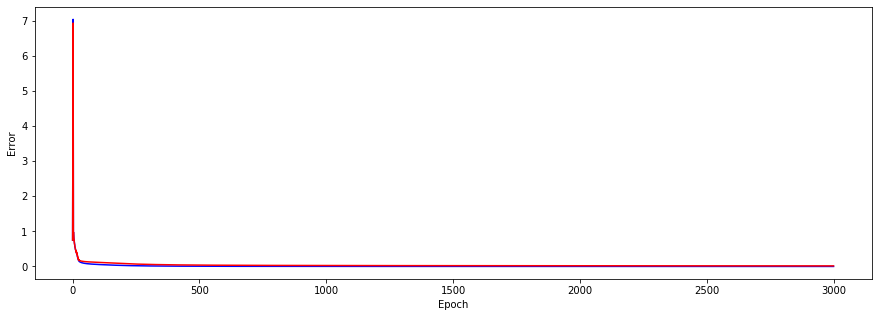

In [184]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history, color = 'blue')
plt.plot(NN.epoch_list, NN.error_test, color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

0.5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.032686
Cost after iteration 1000: 0.015637
Cost after iteration 1500: 0.009578
Cost after iteration 2000: 0.006596
Cost after iteration 2500: 0.004885
Cost after iteration 3000: 0.003805
Cost after iteration 3500: 0.003076
Cost after iteration 4000: 0.002557
Cost after iteration 4500: 0.002173
Cost after iteration 5000: 0.001879
Cost after iteration 5500: 0.001649
Cost after iteration 6000: 0.001464
Cost after iteration 6500: 0.001313
Cost after iteration 7000: 0.001187
Cost after iteration 7500: 0.001082
Cost after iteration 8000: 0.000992
Cost after iteration 8500: 0.000914
Cost after iteration 9000: 0.000847
Cost after iteration 9500: 0.000789


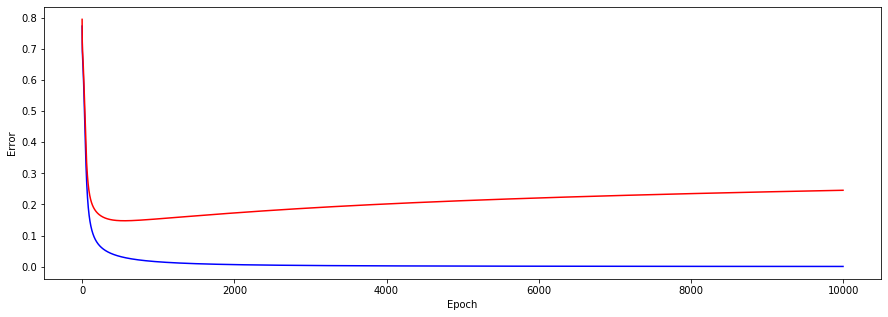

0.5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.029185
Cost after iteration 1000: 0.011989
Cost after iteration 1500: 0.006928
Cost after iteration 2000: 0.004691
Cost after iteration 2500: 0.003475
Cost after iteration 3000: 0.002724
Cost after iteration 3500: 0.002222
Cost after iteration 4000: 0.001865
Cost after iteration 4500: 0.001599
Cost after iteration 5000: 0.001395
Cost after iteration 5500: 0.001234
Cost after iteration 6000: 0.001103
Cost after iteration 6500: 0.000996
Cost after iteration 7000: 0.000907
Cost after iteration 7500: 0.000831
Cost after iteration 8000: 0.000766
Cost after iteration 8500: 0.000709
Cost after iteration 9000: 0.000660
Cost after iteration 9500: 0.000617


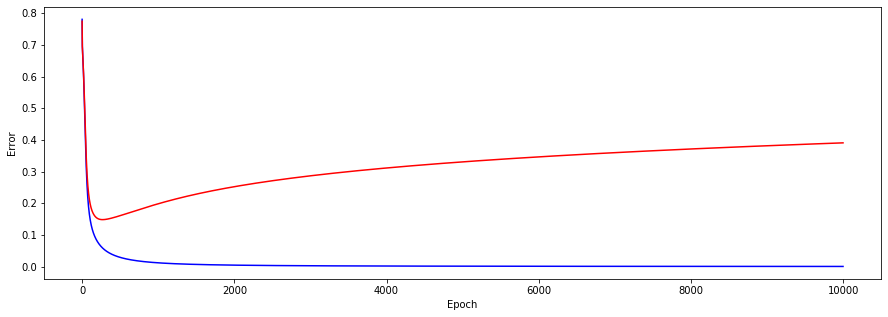

0.5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.030191
Cost after iteration 1000: 0.012479
Cost after iteration 1500: 0.007350
Cost after iteration 2000: 0.005043
Cost after iteration 2500: 0.003768
Cost after iteration 3000: 0.002972
Cost after iteration 3500: 0.002435
Cost after iteration 4000: 0.002050
Cost after iteration 4500: 0.001763
Cost after iteration 5000: 0.001541
Cost after iteration 5500: 0.001365
Cost after iteration 6000: 0.001222
Cost after iteration 6500: 0.001105
Cost after iteration 7000: 0.001006
Cost after iteration 7500: 0.000923
Cost after iteration 8000: 0.000851
Cost after iteration 8500: 0.000789
Cost after iteration 9000: 0.000735
Cost after iteration 9500: 0.000687


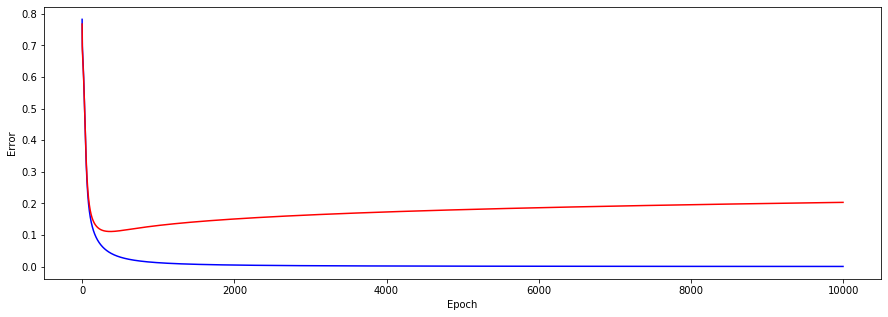

0.5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.030037
Cost after iteration 1000: 0.012096
Cost after iteration 1500: 0.006963
Cost after iteration 2000: 0.004711
Cost after iteration 2500: 0.003488
Cost after iteration 3000: 0.002736
Cost after iteration 3500: 0.002232
Cost after iteration 4000: 0.001873
Cost after iteration 4500: 0.001607
Cost after iteration 5000: 0.001403
Cost after iteration 5500: 0.001241
Cost after iteration 6000: 0.001110
Cost after iteration 6500: 0.001003
Cost after iteration 7000: 0.000913
Cost after iteration 7500: 0.000836
Cost after iteration 8000: 0.000771
Cost after iteration 8500: 0.000715
Cost after iteration 9000: 0.000665
Cost after iteration 9500: 0.000622


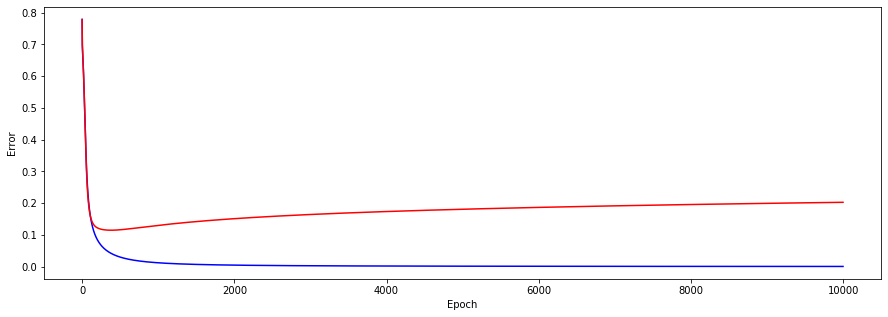

1
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.015630
Cost after iteration 1000: 0.006575
Cost after iteration 1500: 0.003779
Cost after iteration 2000: 0.002519
Cost after iteration 2500: 0.001832
Cost after iteration 3000: 0.001411
Cost after iteration 3500: 0.001132
Cost after iteration 4000: 0.000936
Cost after iteration 4500: 0.000793
Cost after iteration 5000: 0.000684
Cost after iteration 5500: 0.000599
Cost after iteration 6000: 0.000531
Cost after iteration 6500: 0.000475
Cost after iteration 7000: 0.000429
Cost after iteration 7500: 0.000391
Cost after iteration 8000: 0.000358
Cost after iteration 8500: 0.000330
Cost after iteration 9000: 0.000306
Cost after iteration 9500: 0.000284


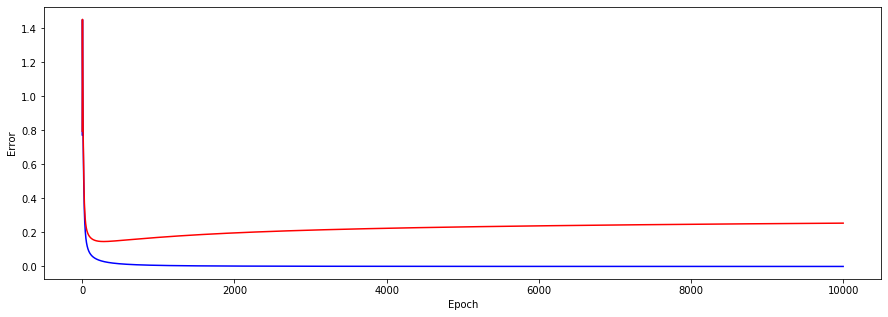

1
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.012010
Cost after iteration 1000: 0.004687
Cost after iteration 1500: 0.002717
Cost after iteration 2000: 0.001857
Cost after iteration 2500: 0.001388
Cost after iteration 3000: 0.001097
Cost after iteration 3500: 0.000901
Cost after iteration 4000: 0.000760
Cost after iteration 4500: 0.000655
Cost after iteration 5000: 0.000574
Cost after iteration 5500: 0.000510
Cost after iteration 6000: 0.000458
Cost after iteration 6500: 0.000414
Cost after iteration 7000: 0.000378
Cost after iteration 7500: 0.000347
Cost after iteration 8000: 0.000321
Cost after iteration 8500: 0.000298
Cost after iteration 9000: 0.000278
Cost after iteration 9500: 0.000260


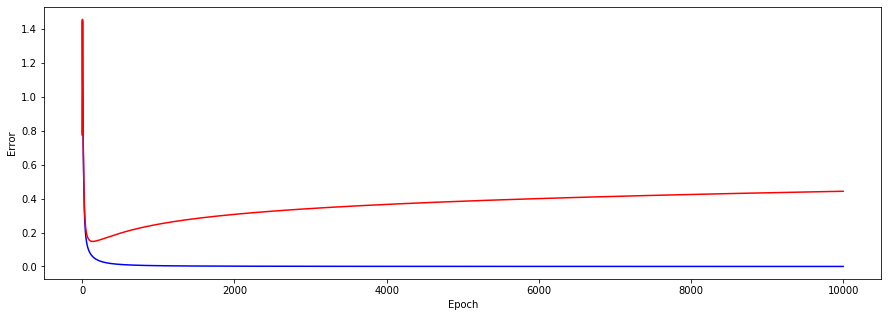

1
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.012508
Cost after iteration 1000: 0.005031
Cost after iteration 1500: 0.002961
Cost after iteration 2000: 0.002041
Cost after iteration 2500: 0.001533
Cost after iteration 3000: 0.001216
Cost after iteration 3500: 0.001001
Cost after iteration 4000: 0.000847
Cost after iteration 4500: 0.000731
Cost after iteration 5000: 0.000641
Cost after iteration 5500: 0.000570
Cost after iteration 6000: 0.000512
Cost after iteration 6500: 0.000464
Cost after iteration 7000: 0.000424
Cost after iteration 7500: 0.000389
Cost after iteration 8000: 0.000360
Cost after iteration 8500: 0.000334
Cost after iteration 9000: 0.000312
Cost after iteration 9500: 0.000292


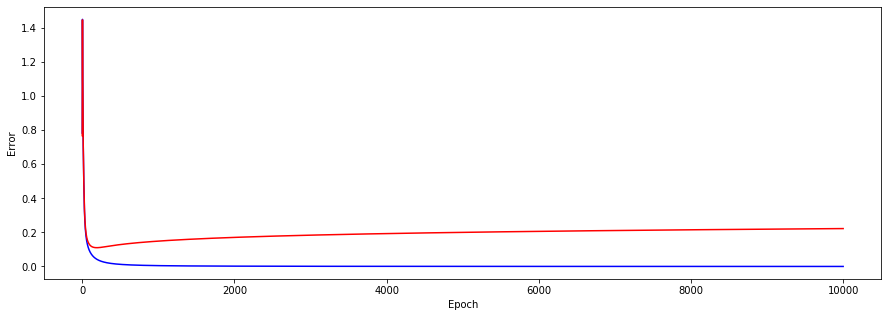

1
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.012174
Cost after iteration 1000: 0.004731
Cost after iteration 1500: 0.002745
Cost after iteration 2000: 0.001878
Cost after iteration 2500: 0.001405
Cost after iteration 3000: 0.001111
Cost after iteration 3500: 0.000913
Cost after iteration 4000: 0.000771
Cost after iteration 4500: 0.000664
Cost after iteration 5000: 0.000582
Cost after iteration 5500: 0.000517
Cost after iteration 6000: 0.000464
Cost after iteration 6500: 0.000420
Cost after iteration 7000: 0.000383
Cost after iteration 7500: 0.000352
Cost after iteration 8000: 0.000325
Cost after iteration 8500: 0.000302
Cost after iteration 9000: 0.000282
Cost after iteration 9500: 0.000264


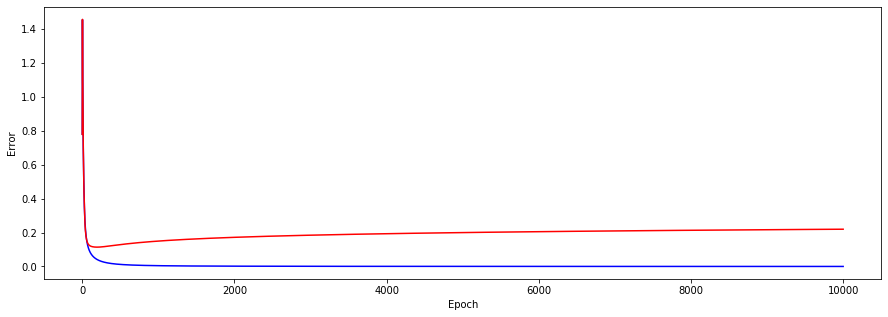

1.5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.008457
Cost after iteration 1000: 0.003050
Cost after iteration 1500: 0.001683
Cost after iteration 2000: 0.001118
Cost after iteration 2500: 0.000821
Cost after iteration 3000: 0.000641
Cost after iteration 3500: 0.000522
Cost after iteration 4000: 0.000438
Cost after iteration 4500: 0.000376
Cost after iteration 5000: 0.000329
Cost after iteration 5500: 0.000291
Cost after iteration 6000: 0.000261
Cost after iteration 6500: 0.000236
Cost after iteration 7000: 0.000215
Cost after iteration 7500: 0.000197
Cost after iteration 8000: 0.000182
Cost after iteration 8500: 0.000169
Cost after iteration 9000: 0.000158
Cost after iteration 9500: 0.000148


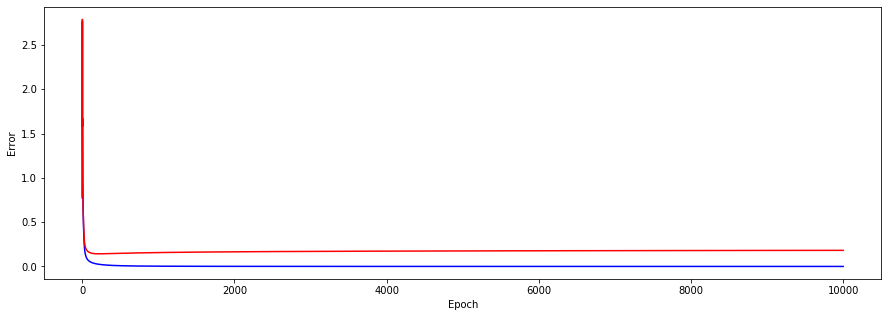

1.5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.006286
Cost after iteration 1000: 0.002334
Cost after iteration 1500: 0.001345
Cost after iteration 2000: 0.000921
Cost after iteration 2500: 0.000691
Cost after iteration 3000: 0.000549
Cost after iteration 3500: 0.000452
Cost after iteration 4000: 0.000383
Cost after iteration 4500: 0.000332
Cost after iteration 5000: 0.000291
Cost after iteration 5500: 0.000260
Cost after iteration 6000: 0.000234
Cost after iteration 6500: 0.000212
Cost after iteration 7000: 0.000194
Cost after iteration 7500: 0.000179
Cost after iteration 8000: 0.000165
Cost after iteration 8500: 0.000154
Cost after iteration 9000: 0.000144
Cost after iteration 9500: 0.000135


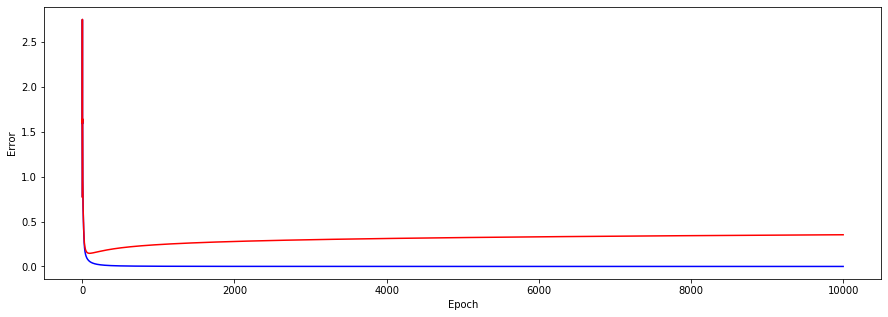

1.5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.006893
Cost after iteration 1000: 0.002618
Cost after iteration 1500: 0.001516
Cost after iteration 2000: 0.001039
Cost after iteration 2500: 0.000780
Cost after iteration 3000: 0.000619
Cost after iteration 3500: 0.000510
Cost after iteration 4000: 0.000432
Cost after iteration 4500: 0.000373
Cost after iteration 5000: 0.000328
Cost after iteration 5500: 0.000291
Cost after iteration 6000: 0.000262
Cost after iteration 6500: 0.000238
Cost after iteration 7000: 0.000217
Cost after iteration 7500: 0.000200
Cost after iteration 8000: 0.000185
Cost after iteration 8500: 0.000172
Cost after iteration 9000: 0.000161
Cost after iteration 9500: 0.000150


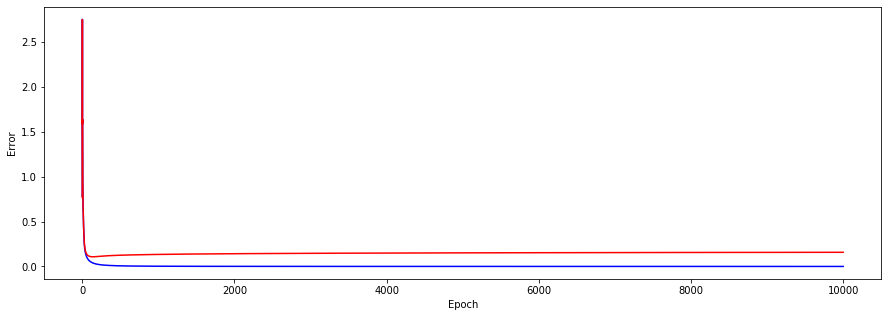

1.5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.006286
Cost after iteration 1000: 0.002362
Cost after iteration 1500: 0.001369
Cost after iteration 2000: 0.000940
Cost after iteration 2500: 0.000706
Cost after iteration 3000: 0.000561
Cost after iteration 3500: 0.000462
Cost after iteration 4000: 0.000392
Cost after iteration 4500: 0.000339
Cost after iteration 5000: 0.000298
Cost after iteration 5500: 0.000265
Cost after iteration 6000: 0.000238
Cost after iteration 6500: 0.000216
Cost after iteration 7000: 0.000198
Cost after iteration 7500: 0.000182
Cost after iteration 8000: 0.000169
Cost after iteration 8500: 0.000157
Cost after iteration 9000: 0.000147
Cost after iteration 9500: 0.000137


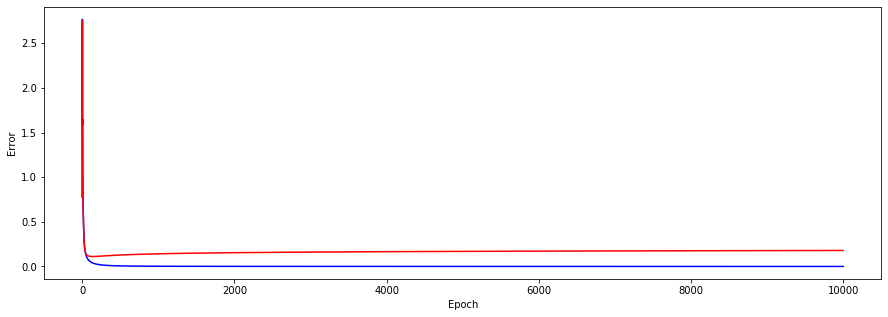

2
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.004971
Cost after iteration 1000: 0.001790
Cost after iteration 1500: 0.001013
Cost after iteration 2000: 0.000686
Cost after iteration 2500: 0.000511
Cost after iteration 3000: 0.000403
Cost after iteration 3500: 0.000331
Cost after iteration 4000: 0.000279
Cost after iteration 4500: 0.000241
Cost after iteration 5000: 0.000211
Cost after iteration 5500: 0.000188
Cost after iteration 6000: 0.000169
Cost after iteration 6500: 0.000153
Cost after iteration 7000: 0.000140
Cost after iteration 7500: 0.000129
Cost after iteration 8000: 0.000119
Cost after iteration 8500: 0.000111
Cost after iteration 9000: 0.000103
Cost after iteration 9500: 0.000097


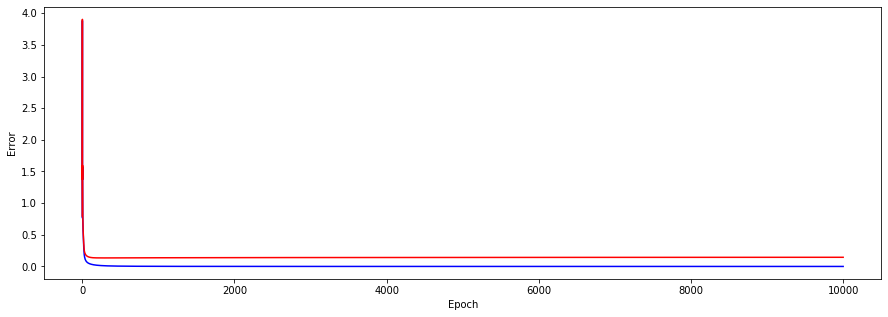

2
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.003759
Cost after iteration 1000: 0.001457
Cost after iteration 1500: 0.000861
Cost after iteration 2000: 0.000599
Cost after iteration 2500: 0.000454
Cost after iteration 3000: 0.000363
Cost after iteration 3500: 0.000301
Cost after iteration 4000: 0.000256
Cost after iteration 4500: 0.000222
Cost after iteration 5000: 0.000196
Cost after iteration 5500: 0.000175
Cost after iteration 6000: 0.000158
Cost after iteration 6500: 0.000144
Cost after iteration 7000: 0.000132
Cost after iteration 7500: 0.000122
Cost after iteration 8000: 0.000113
Cost after iteration 8500: 0.000105
Cost after iteration 9000: 0.000098
Cost after iteration 9500: 0.000092


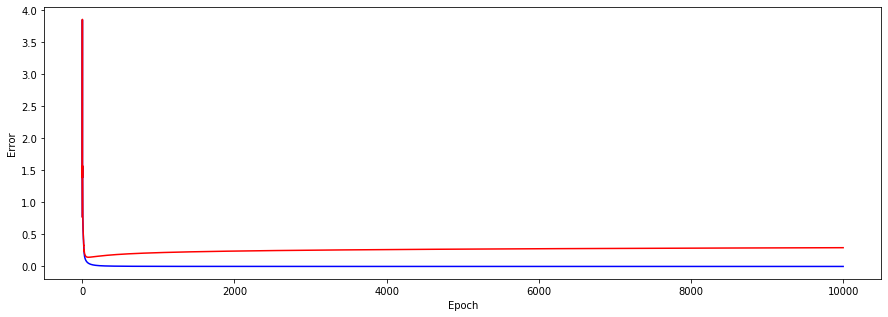

2
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.004121
Cost after iteration 1000: 0.001616
Cost after iteration 1500: 0.000953
Cost after iteration 2000: 0.000660
Cost after iteration 2500: 0.000498
Cost after iteration 3000: 0.000396
Cost after iteration 3500: 0.000327
Cost after iteration 4000: 0.000278
Cost after iteration 4500: 0.000240
Cost after iteration 5000: 0.000211
Cost after iteration 5500: 0.000188
Cost after iteration 6000: 0.000169
Cost after iteration 6500: 0.000154
Cost after iteration 7000: 0.000141
Cost after iteration 7500: 0.000129
Cost after iteration 8000: 0.000120
Cost after iteration 8500: 0.000111
Cost after iteration 9000: 0.000104
Cost after iteration 9500: 0.000098


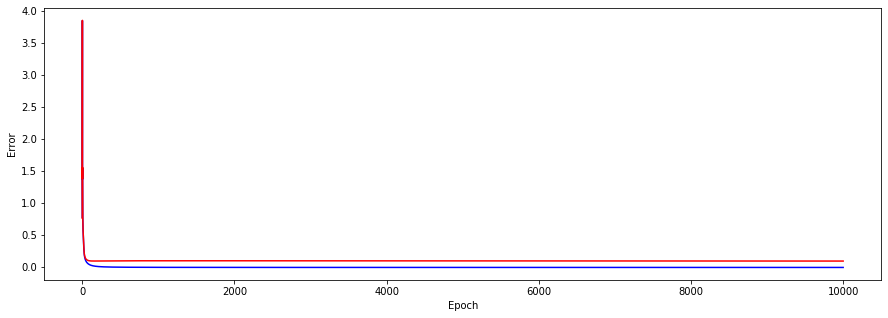

2
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.003882
Cost after iteration 1000: 0.001518
Cost after iteration 1500: 0.000899
Cost after iteration 2000: 0.000626
Cost after iteration 2500: 0.000474
Cost after iteration 3000: 0.000380
Cost after iteration 3500: 0.000315
Cost after iteration 4000: 0.000268
Cost after iteration 4500: 0.000233
Cost after iteration 5000: 0.000205
Cost after iteration 5500: 0.000183
Cost after iteration 6000: 0.000165
Cost after iteration 6500: 0.000151
Cost after iteration 7000: 0.000138
Cost after iteration 7500: 0.000127
Cost after iteration 8000: 0.000118
Cost after iteration 8500: 0.000110
Cost after iteration 9000: 0.000103
Cost after iteration 9500: 0.000097


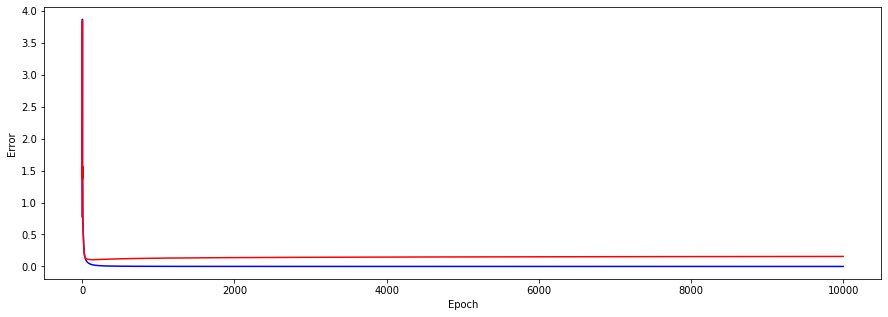

2.5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.003315
Cost after iteration 1000: 0.001201
Cost after iteration 1500: 0.000687
Cost after iteration 2000: 0.000470
Cost after iteration 2500: 0.000353
Cost after iteration 3000: 0.000281
Cost after iteration 3500: 0.000232
Cost after iteration 4000: 0.000197
Cost after iteration 4500: 0.000171
Cost after iteration 5000: 0.000151
Cost after iteration 5500: 0.000135
Cost after iteration 6000: 0.000122
Cost after iteration 6500: 0.000111
Cost after iteration 7000: 0.000102
Cost after iteration 7500: 0.000094
Cost after iteration 8000: 0.000087
Cost after iteration 8500: 0.000081
Cost after iteration 9000: 0.000076
Cost after iteration 9500: 0.000071


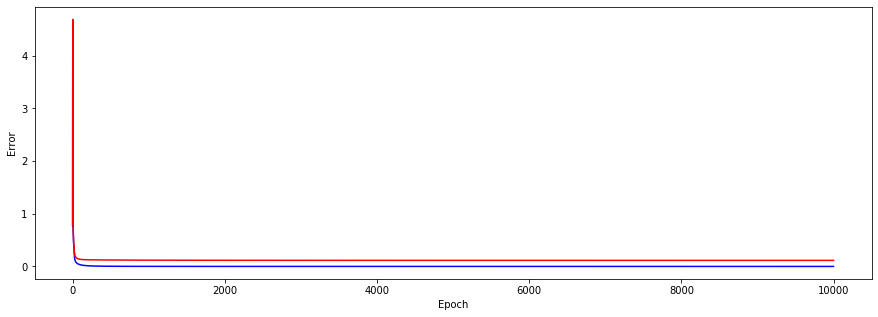

2.5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.002567
Cost after iteration 1000: 0.001021
Cost after iteration 1500: 0.000612
Cost after iteration 2000: 0.000429
Cost after iteration 2500: 0.000328
Cost after iteration 3000: 0.000264
Cost after iteration 3500: 0.000220
Cost after iteration 4000: 0.000188
Cost after iteration 4500: 0.000164
Cost after iteration 5000: 0.000145
Cost after iteration 5500: 0.000130
Cost after iteration 6000: 0.000117
Cost after iteration 6500: 0.000107
Cost after iteration 7000: 0.000098
Cost after iteration 7500: 0.000091
Cost after iteration 8000: 0.000084
Cost after iteration 8500: 0.000079
Cost after iteration 9000: 0.000074
Cost after iteration 9500: 0.000069


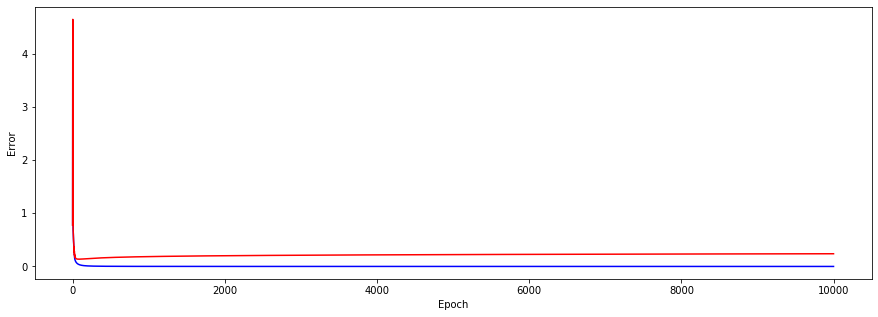

2.5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.002750
Cost after iteration 1000: 0.001096
Cost after iteration 1500: 0.000658
Cost after iteration 2000: 0.000462
Cost after iteration 2500: 0.000353
Cost after iteration 3000: 0.000284
Cost after iteration 3500: 0.000237
Cost after iteration 4000: 0.000202
Cost after iteration 4500: 0.000176
Cost after iteration 5000: 0.000156
Cost after iteration 5500: 0.000140
Cost after iteration 6000: 0.000127
Cost after iteration 6500: 0.000115
Cost after iteration 7000: 0.000106
Cost after iteration 7500: 0.000098
Cost after iteration 8000: 0.000091
Cost after iteration 8500: 0.000085
Cost after iteration 9000: 0.000080
Cost after iteration 9500: 0.000075


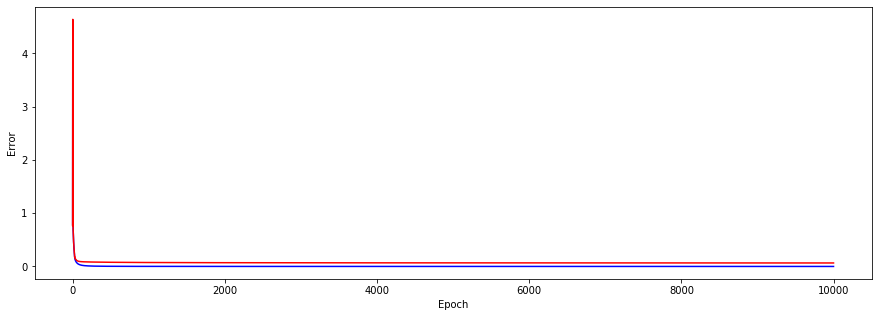

2.5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.002561
Cost after iteration 1000: 0.001025
Cost after iteration 1500: 0.000616
Cost after iteration 2000: 0.000434
Cost after iteration 2500: 0.000332
Cost after iteration 3000: 0.000267
Cost after iteration 3500: 0.000223
Cost after iteration 4000: 0.000190
Cost after iteration 4500: 0.000166
Cost after iteration 5000: 0.000147
Cost after iteration 5500: 0.000132
Cost after iteration 6000: 0.000119
Cost after iteration 6500: 0.000109
Cost after iteration 7000: 0.000100
Cost after iteration 7500: 0.000092
Cost after iteration 8000: 0.000086
Cost after iteration 8500: 0.000080
Cost after iteration 9000: 0.000075
Cost after iteration 9500: 0.000071


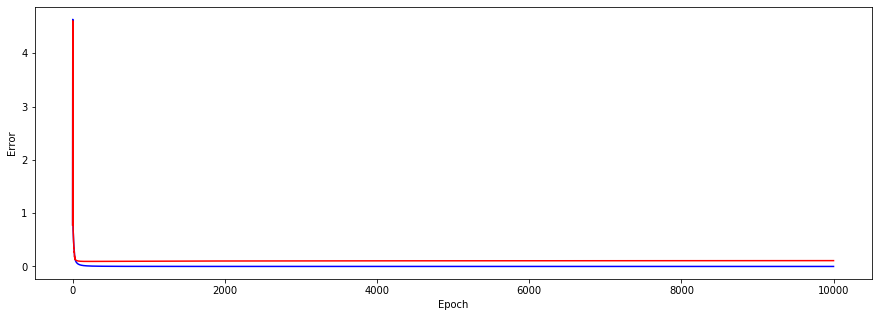

3
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.002341
Cost after iteration 1000: 0.000926
Cost after iteration 1500: 0.000552
Cost after iteration 2000: 0.000385
Cost after iteration 2500: 0.000293
Cost after iteration 3000: 0.000235
Cost after iteration 3500: 0.000195
Cost after iteration 4000: 0.000166
Cost after iteration 4500: 0.000144
Cost after iteration 5000: 0.000128
Cost after iteration 5500: 0.000114
Cost after iteration 6000: 0.000103
Cost after iteration 6500: 0.000094
Cost after iteration 7000: 0.000086
Cost after iteration 7500: 0.000079
Cost after iteration 8000: 0.000074
Cost after iteration 8500: 0.000069
Cost after iteration 9000: 0.000064
Cost after iteration 9500: 0.000061


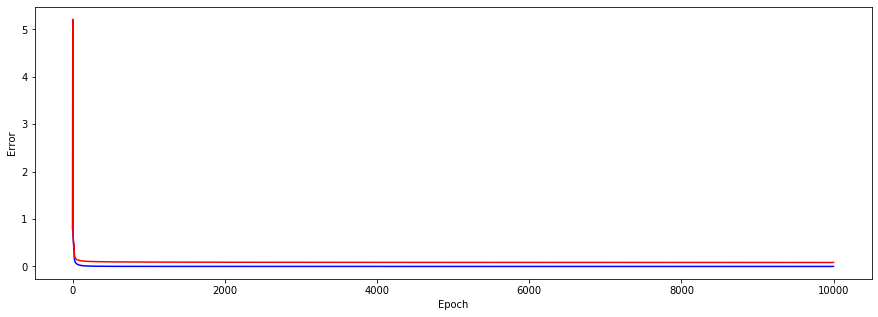

3
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.001887
Cost after iteration 1000: 0.000789
Cost after iteration 1500: 0.000484
Cost after iteration 2000: 0.000345
Cost after iteration 2500: 0.000266
Cost after iteration 3000: 0.000215
Cost after iteration 3500: 0.000180
Cost after iteration 4000: 0.000155
Cost after iteration 4500: 0.000136
Cost after iteration 5000: 0.000120
Cost after iteration 5500: 0.000108
Cost after iteration 6000: 0.000098
Cost after iteration 6500: 0.000090
Cost after iteration 7000: 0.000082
Cost after iteration 7500: 0.000076
Cost after iteration 8000: 0.000071
Cost after iteration 8500: 0.000066
Cost after iteration 9000: 0.000062
Cost after iteration 9500: 0.000059


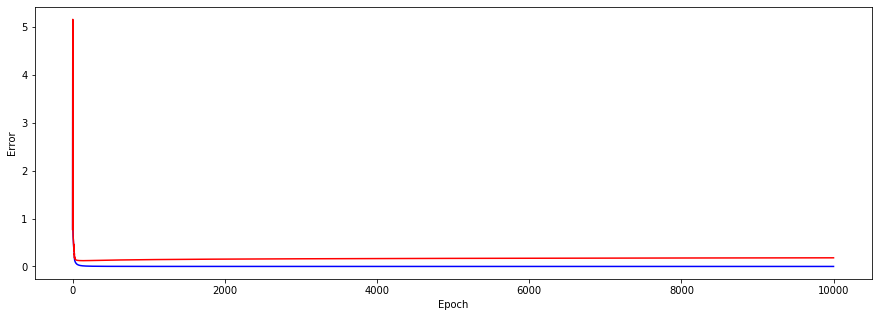

3
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.001980
Cost after iteration 1000: 0.000830
Cost after iteration 1500: 0.000510
Cost after iteration 2000: 0.000364
Cost after iteration 2500: 0.000281
Cost after iteration 3000: 0.000227
Cost after iteration 3500: 0.000191
Cost after iteration 4000: 0.000164
Cost after iteration 4500: 0.000143
Cost after iteration 5000: 0.000127
Cost after iteration 5500: 0.000114
Cost after iteration 6000: 0.000103
Cost after iteration 6500: 0.000095
Cost after iteration 7000: 0.000087
Cost after iteration 7500: 0.000081
Cost after iteration 8000: 0.000075
Cost after iteration 8500: 0.000070
Cost after iteration 9000: 0.000066
Cost after iteration 9500: 0.000062


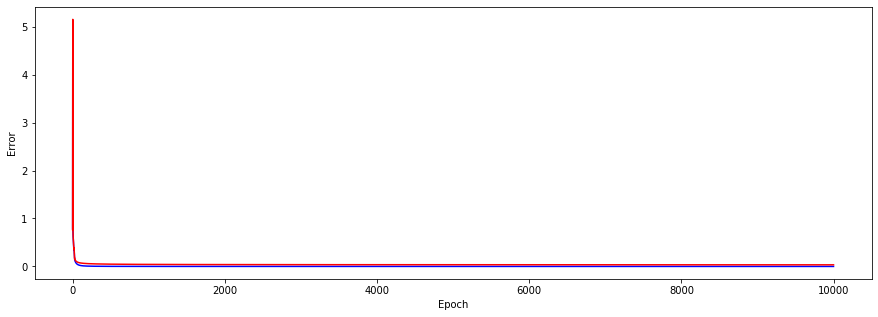

3
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.001993
Cost after iteration 1000: 0.000830
Cost after iteration 1500: 0.000507
Cost after iteration 2000: 0.000359
Cost after iteration 2500: 0.000276
Cost after iteration 3000: 0.000223
Cost after iteration 3500: 0.000186
Cost after iteration 4000: 0.000160
Cost after iteration 4500: 0.000139
Cost after iteration 5000: 0.000123
Cost after iteration 5500: 0.000111
Cost after iteration 6000: 0.000100
Cost after iteration 6500: 0.000091
Cost after iteration 7000: 0.000084
Cost after iteration 7500: 0.000078
Cost after iteration 8000: 0.000072
Cost after iteration 8500: 0.000067
Cost after iteration 9000: 0.000063
Cost after iteration 9500: 0.000059


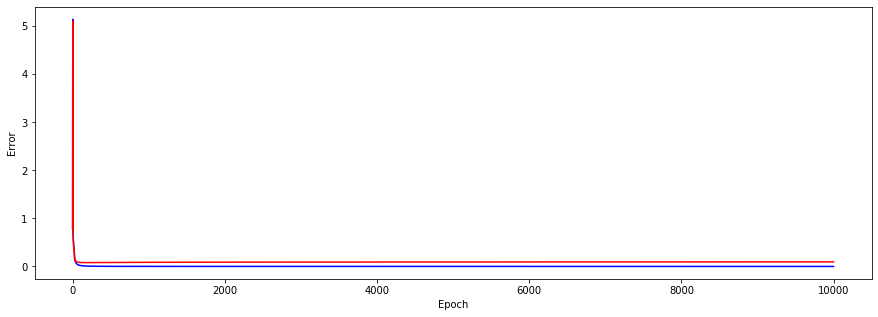

3.5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.001906
Cost after iteration 1000: 0.000754
Cost after iteration 1500: 0.000454
Cost after iteration 2000: 0.000320
Cost after iteration 2500: 0.000245
Cost after iteration 3000: 0.000198
Cost after iteration 3500: 0.000165
Cost after iteration 4000: 0.000142
Cost after iteration 4500: 0.000124
Cost after iteration 5000: 0.000110
Cost after iteration 5500: 0.000098
Cost after iteration 6000: 0.000089
Cost after iteration 6500: 0.000081
Cost after iteration 7000: 0.000075
Cost after iteration 7500: 0.000069
Cost after iteration 8000: 0.000064
Cost after iteration 8500: 0.000060
Cost after iteration 9000: 0.000056
Cost after iteration 9500: 0.000053


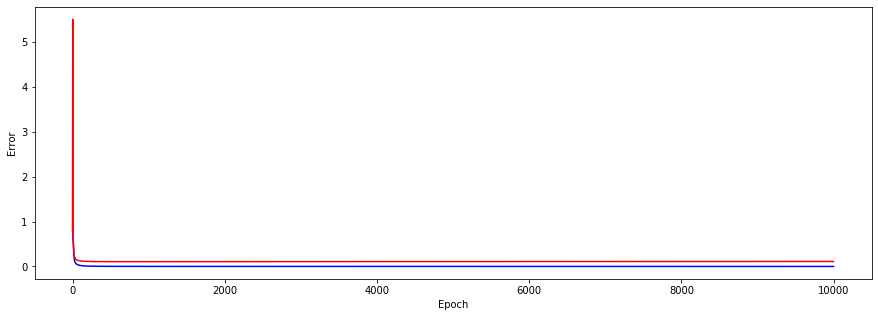

3.5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.001647
Cost after iteration 1000: 0.000693
Cost after iteration 1500: 0.000426
Cost after iteration 2000: 0.000304
Cost after iteration 2500: 0.000235
Cost after iteration 3000: 0.000190
Cost after iteration 3500: 0.000159
Cost after iteration 4000: 0.000137
Cost after iteration 4500: 0.000120
Cost after iteration 5000: 0.000106
Cost after iteration 5500: 0.000096
Cost after iteration 6000: 0.000087
Cost after iteration 6500: 0.000079
Cost after iteration 7000: 0.000073
Cost after iteration 7500: 0.000067
Cost after iteration 8000: 0.000063
Cost after iteration 8500: 0.000059
Cost after iteration 9000: 0.000055
Cost after iteration 9500: 0.000052


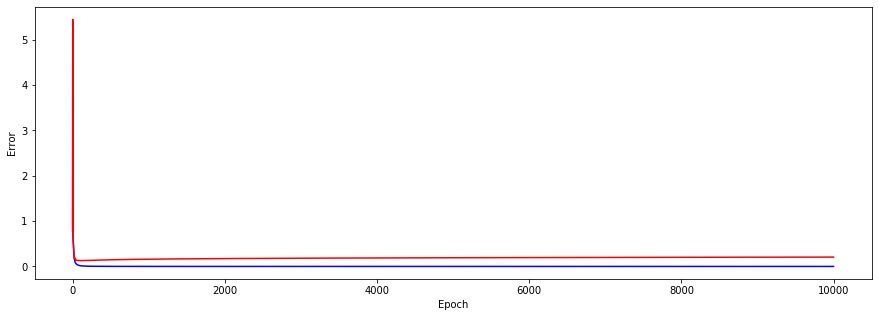

3.5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.001712
Cost after iteration 1000: 0.000715
Cost after iteration 1500: 0.000439
Cost after iteration 2000: 0.000312
Cost after iteration 2500: 0.000241
Cost after iteration 3000: 0.000195
Cost after iteration 3500: 0.000163
Cost after iteration 4000: 0.000140
Cost after iteration 4500: 0.000123
Cost after iteration 5000: 0.000109
Cost after iteration 5500: 0.000098
Cost after iteration 6000: 0.000089
Cost after iteration 6500: 0.000081
Cost after iteration 7000: 0.000075
Cost after iteration 7500: 0.000069
Cost after iteration 8000: 0.000064
Cost after iteration 8500: 0.000060
Cost after iteration 9000: 0.000056
Cost after iteration 9500: 0.000053


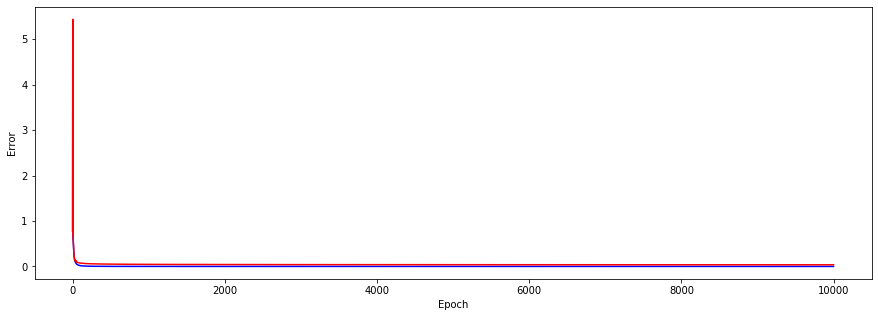

3.5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.001743
Cost after iteration 1000: 0.000732
Cost after iteration 1500: 0.000449
Cost after iteration 2000: 0.000319
Cost after iteration 2500: 0.000245
Cost after iteration 3000: 0.000198
Cost after iteration 3500: 0.000166
Cost after iteration 4000: 0.000142
Cost after iteration 4500: 0.000124
Cost after iteration 5000: 0.000110
Cost after iteration 5500: 0.000098
Cost after iteration 6000: 0.000089
Cost after iteration 6500: 0.000081
Cost after iteration 7000: 0.000075
Cost after iteration 7500: 0.000069
Cost after iteration 8000: 0.000064
Cost after iteration 8500: 0.000060
Cost after iteration 9000: 0.000056
Cost after iteration 9500: 0.000053


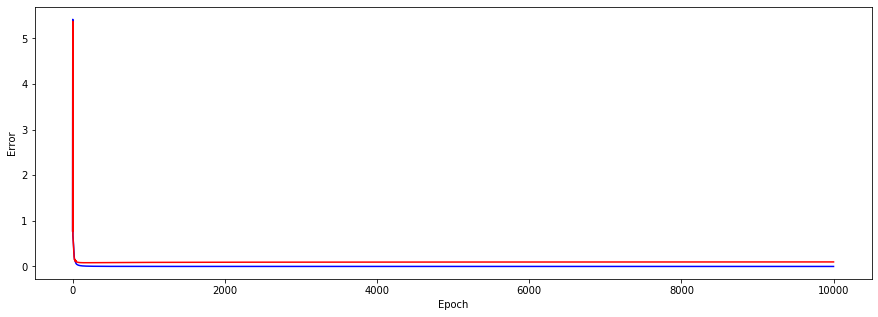

4
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.001891
Cost after iteration 1000: 0.000737
Cost after iteration 1500: 0.000441
Cost after iteration 2000: 0.000310
Cost after iteration 2500: 0.000237
Cost after iteration 3000: 0.000191
Cost after iteration 3500: 0.000160
Cost after iteration 4000: 0.000137
Cost after iteration 4500: 0.000119
Cost after iteration 5000: 0.000106
Cost after iteration 5500: 0.000095
Cost after iteration 6000: 0.000086
Cost after iteration 6500: 0.000078
Cost after iteration 7000: 0.000072
Cost after iteration 7500: 0.000066
Cost after iteration 8000: 0.000062
Cost after iteration 8500: 0.000058
Cost after iteration 9000: 0.000054
Cost after iteration 9500: 0.000051


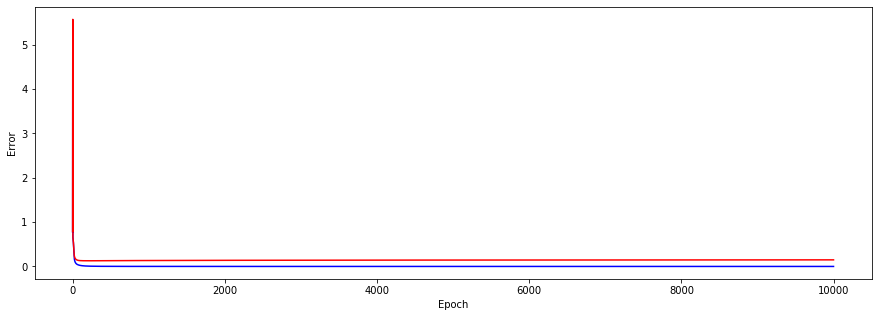

4
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.001622
Cost after iteration 1000: 0.000670
Cost after iteration 1500: 0.000409
Cost after iteration 2000: 0.000290
Cost after iteration 2500: 0.000222
Cost after iteration 3000: 0.000180
Cost after iteration 3500: 0.000150
Cost after iteration 4000: 0.000129
Cost after iteration 4500: 0.000112
Cost after iteration 5000: 0.000099
Cost after iteration 5500: 0.000089
Cost after iteration 6000: 0.000081
Cost after iteration 6500: 0.000074
Cost after iteration 7000: 0.000068
Cost after iteration 7500: 0.000062
Cost after iteration 8000: 0.000058
Cost after iteration 8500: 0.000054
Cost after iteration 9000: 0.000051
Cost after iteration 9500: 0.000048


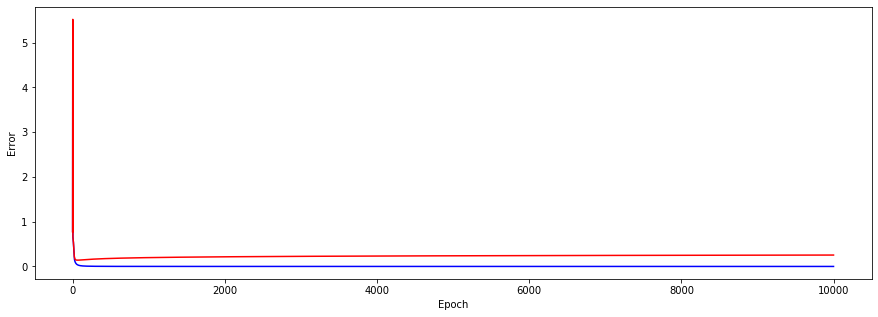

4
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.001671
Cost after iteration 1000: 0.000690
Cost after iteration 1500: 0.000422
Cost after iteration 2000: 0.000300
Cost after iteration 2500: 0.000231
Cost after iteration 3000: 0.000187
Cost after iteration 3500: 0.000157
Cost after iteration 4000: 0.000135
Cost after iteration 4500: 0.000118
Cost after iteration 5000: 0.000105
Cost after iteration 5500: 0.000094
Cost after iteration 6000: 0.000085
Cost after iteration 6500: 0.000078
Cost after iteration 7000: 0.000072
Cost after iteration 7500: 0.000066
Cost after iteration 8000: 0.000062
Cost after iteration 8500: 0.000058
Cost after iteration 9000: 0.000054
Cost after iteration 9500: 0.000051


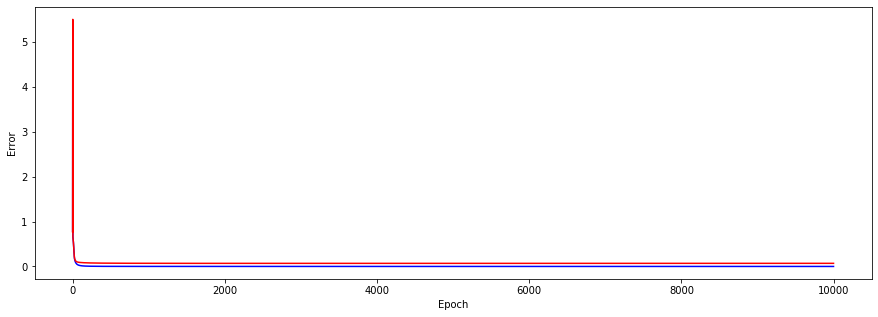

4
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.001723
Cost after iteration 1000: 0.000717
Cost after iteration 1500: 0.000439
Cost after iteration 2000: 0.000312
Cost after iteration 2500: 0.000240
Cost after iteration 3000: 0.000194
Cost after iteration 3500: 0.000163
Cost after iteration 4000: 0.000139
Cost after iteration 4500: 0.000122
Cost after iteration 5000: 0.000108
Cost after iteration 5500: 0.000097
Cost after iteration 6000: 0.000088
Cost after iteration 6500: 0.000080
Cost after iteration 7000: 0.000074
Cost after iteration 7500: 0.000068
Cost after iteration 8000: 0.000063
Cost after iteration 8500: 0.000059
Cost after iteration 9000: 0.000056
Cost after iteration 9500: 0.000052


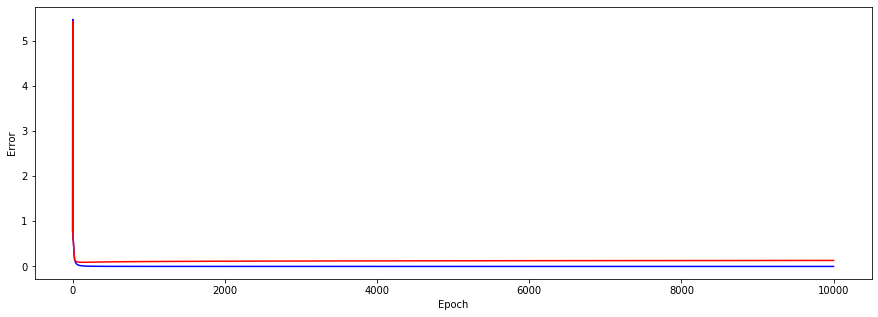

4.5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.002158
Cost after iteration 1000: 0.000862
Cost after iteration 1500: 0.000519
Cost after iteration 2000: 0.000365
Cost after iteration 2500: 0.000279
Cost after iteration 3000: 0.000225
Cost after iteration 3500: 0.000187
Cost after iteration 4000: 0.000160
Cost after iteration 4500: 0.000139
Cost after iteration 5000: 0.000123
Cost after iteration 5500: 0.000110
Cost after iteration 6000: 0.000100
Cost after iteration 6500: 0.000091
Cost after iteration 7000: 0.000084
Cost after iteration 7500: 0.000077
Cost after iteration 8000: 0.000072
Cost after iteration 8500: 0.000067
Cost after iteration 9000: 0.000063
Cost after iteration 9500: 0.000059


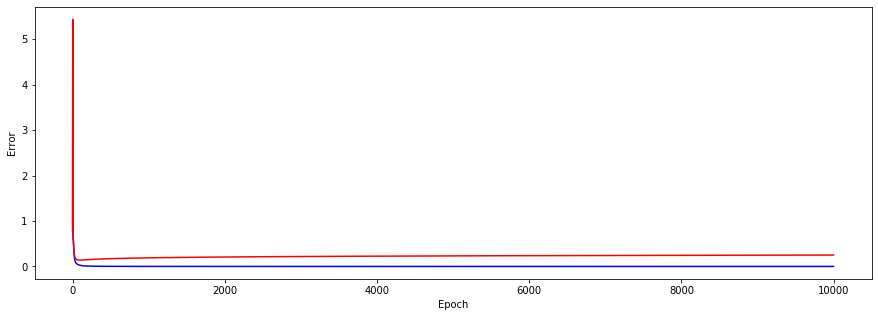

4.5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.001976
Cost after iteration 1000: 0.000787
Cost after iteration 1500: 0.000472
Cost after iteration 2000: 0.000331
Cost after iteration 2500: 0.000253
Cost after iteration 3000: 0.000203
Cost after iteration 3500: 0.000169
Cost after iteration 4000: 0.000145
Cost after iteration 4500: 0.000126
Cost after iteration 5000: 0.000112
Cost after iteration 5500: 0.000100
Cost after iteration 6000: 0.000090
Cost after iteration 6500: 0.000083
Cost after iteration 7000: 0.000076
Cost after iteration 7500: 0.000070
Cost after iteration 8000: 0.000065
Cost after iteration 8500: 0.000061
Cost after iteration 9000: 0.000057
Cost after iteration 9500: 0.000054


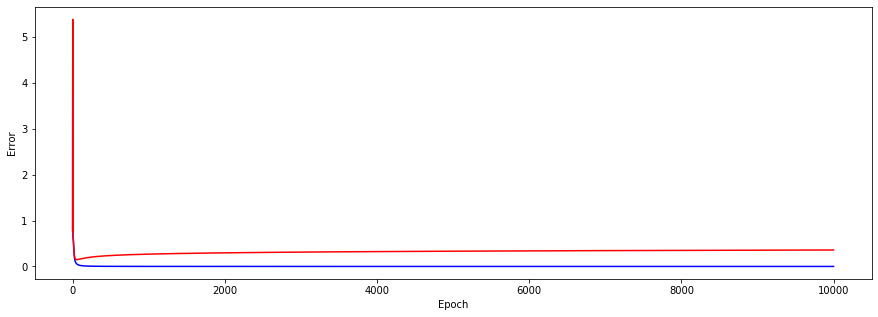

4.5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.002285
Cost after iteration 1000: 0.000889
Cost after iteration 1500: 0.000525
Cost after iteration 2000: 0.000364
Cost after iteration 2500: 0.000276
Cost after iteration 3000: 0.000220
Cost after iteration 3500: 0.000182
Cost after iteration 4000: 0.000155
Cost after iteration 4500: 0.000135
Cost after iteration 5000: 0.000119
Cost after iteration 5500: 0.000106
Cost after iteration 6000: 0.000095
Cost after iteration 6500: 0.000087
Cost after iteration 7000: 0.000079
Cost after iteration 7500: 0.000073
Cost after iteration 8000: 0.000068
Cost after iteration 8500: 0.000063
Cost after iteration 9000: 0.000059
Cost after iteration 9500: 0.000055


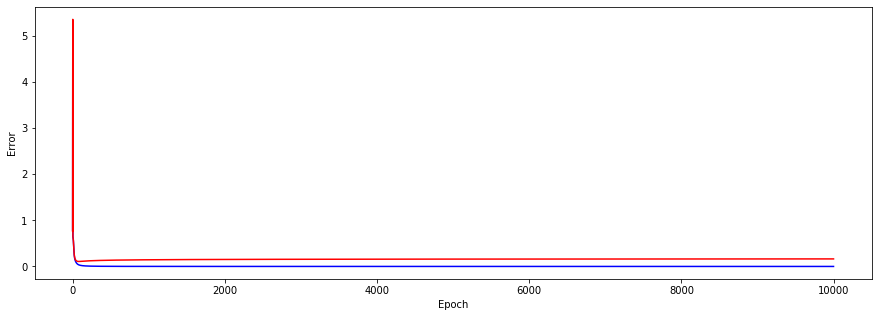

4.5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.002059
Cost after iteration 1000: 0.000819
Cost after iteration 1500: 0.000492
Cost after iteration 2000: 0.000346
Cost after iteration 2500: 0.000264
Cost after iteration 3000: 0.000213
Cost after iteration 3500: 0.000177
Cost after iteration 4000: 0.000152
Cost after iteration 4500: 0.000132
Cost after iteration 5000: 0.000117
Cost after iteration 5500: 0.000105
Cost after iteration 6000: 0.000095
Cost after iteration 6500: 0.000087
Cost after iteration 7000: 0.000080
Cost after iteration 7500: 0.000074
Cost after iteration 8000: 0.000068
Cost after iteration 8500: 0.000064
Cost after iteration 9000: 0.000060
Cost after iteration 9500: 0.000056


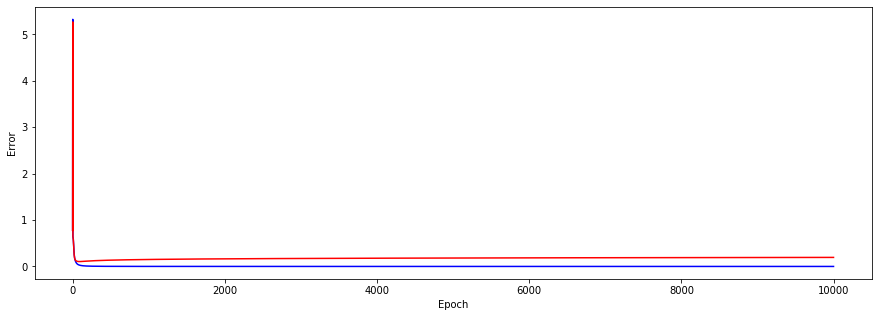

5
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.002457
Cost after iteration 1000: 0.001018
Cost after iteration 1500: 0.000620
Cost after iteration 2000: 0.000438
Cost after iteration 2500: 0.000335
Cost after iteration 3000: 0.000269
Cost after iteration 3500: 0.000224
Cost after iteration 4000: 0.000191
Cost after iteration 4500: 0.000166
Cost after iteration 5000: 0.000147
Cost after iteration 5500: 0.000131
Cost after iteration 6000: 0.000119
Cost after iteration 6500: 0.000108
Cost after iteration 7000: 0.000099
Cost after iteration 7500: 0.000091
Cost after iteration 8000: 0.000084
Cost after iteration 8500: 0.000079
Cost after iteration 9000: 0.000073
Cost after iteration 9500: 0.000069


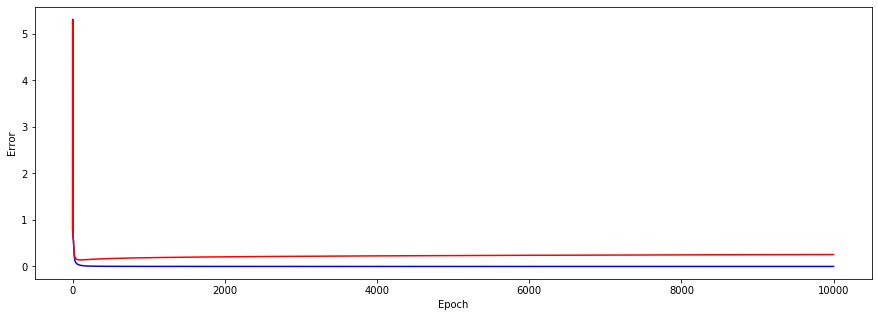

5
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.002422
Cost after iteration 1000: 0.000966
Cost after iteration 1500: 0.000571
Cost after iteration 2000: 0.000397
Cost after iteration 2500: 0.000302
Cost after iteration 3000: 0.000243
Cost after iteration 3500: 0.000202
Cost after iteration 4000: 0.000173
Cost after iteration 4500: 0.000151
Cost after iteration 5000: 0.000134
Cost after iteration 5500: 0.000120
Cost after iteration 6000: 0.000109
Cost after iteration 6500: 0.000099
Cost after iteration 7000: 0.000091
Cost after iteration 7500: 0.000084
Cost after iteration 8000: 0.000078
Cost after iteration 8500: 0.000073
Cost after iteration 9000: 0.000069
Cost after iteration 9500: 0.000065


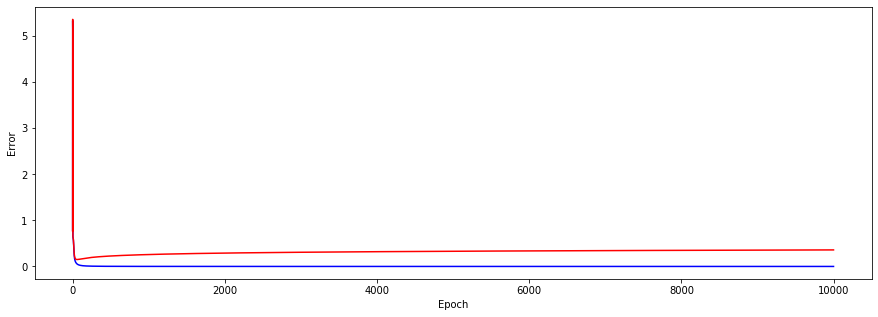

5
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.002568
Cost after iteration 1000: 0.001059
Cost after iteration 1500: 0.000645
Cost after iteration 2000: 0.000458
Cost after iteration 2500: 0.000352
Cost after iteration 3000: 0.000285
Cost after iteration 3500: 0.000238
Cost after iteration 4000: 0.000204
Cost after iteration 4500: 0.000179
Cost after iteration 5000: 0.000158
Cost after iteration 5500: 0.000142
Cost after iteration 6000: 0.000129
Cost after iteration 6500: 0.000118
Cost after iteration 7000: 0.000108
Cost after iteration 7500: 0.000100
Cost after iteration 8000: 0.000093
Cost after iteration 8500: 0.000087
Cost after iteration 9000: 0.000082
Cost after iteration 9500: 0.000077


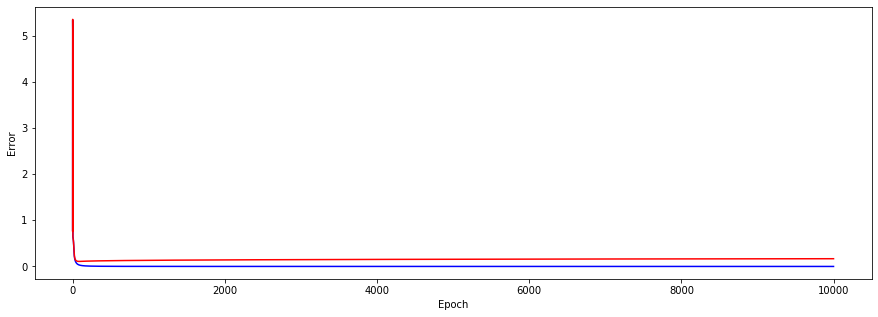

5
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.002520
Cost after iteration 1000: 0.001048
Cost after iteration 1500: 0.000642
Cost after iteration 2000: 0.000457
Cost after iteration 2500: 0.000352
Cost after iteration 3000: 0.000285
Cost after iteration 3500: 0.000239
Cost after iteration 4000: 0.000205
Cost after iteration 4500: 0.000180
Cost after iteration 5000: 0.000159
Cost after iteration 5500: 0.000143
Cost after iteration 6000: 0.000130
Cost after iteration 6500: 0.000118
Cost after iteration 7000: 0.000109
Cost after iteration 7500: 0.000101
Cost after iteration 8000: 0.000093
Cost after iteration 8500: 0.000087
Cost after iteration 9000: 0.000082
Cost after iteration 9500: 0.000077


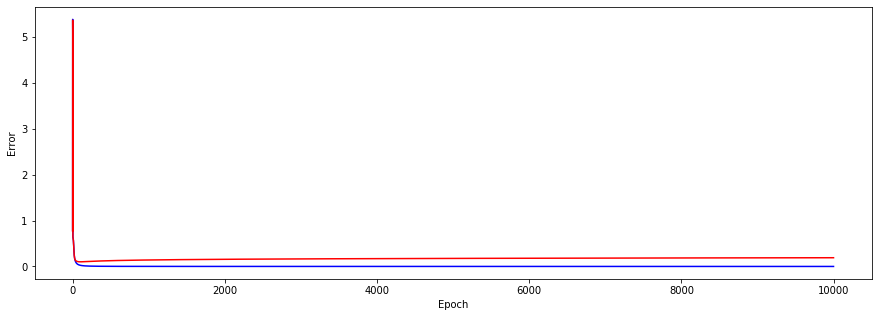

[(0.5, array([[0.26060243]])),
 (1, array([[0.28506077]])),
 (1.5, array([[0.21796394]])),
 (2, array([[0.17357719]])),
 (2.5, array([[0.13209688]])),
 (3, array([[0.09847419]])),
 (3.5, array([[0.11308785]])),
 (4, array([[0.15133668]])),
 (4.5, array([[0.24199575]])),
 (5, array([[0.24310534]]))]

In [497]:
lr_list = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
out = []
for l in lr_list:
    x = Test.test_NN(k1,k2,k3,k4, output, lr=l)
    out += [(l,x)]
out

45
Cost after iteration 0: 0.773492
Cost after iteration 500: 0.002341
Cost after iteration 1000: 0.000926
Cost after iteration 1500: 0.000552
Cost after iteration 2000: 0.000385
Cost after iteration 2500: 0.000293
Cost after iteration 3000: 0.000235
Cost after iteration 3500: 0.000195
Cost after iteration 4000: 0.000166
Cost after iteration 4500: 0.000144
Cost after iteration 5000: 0.000128
Cost after iteration 5500: 0.000114
Cost after iteration 6000: 0.000103
Cost after iteration 6500: 0.000094
Cost after iteration 7000: 0.000086
Cost after iteration 7500: 0.000079
Cost after iteration 8000: 0.000074
Cost after iteration 8500: 0.000069
Cost after iteration 9000: 0.000064
Cost after iteration 9500: 0.000061


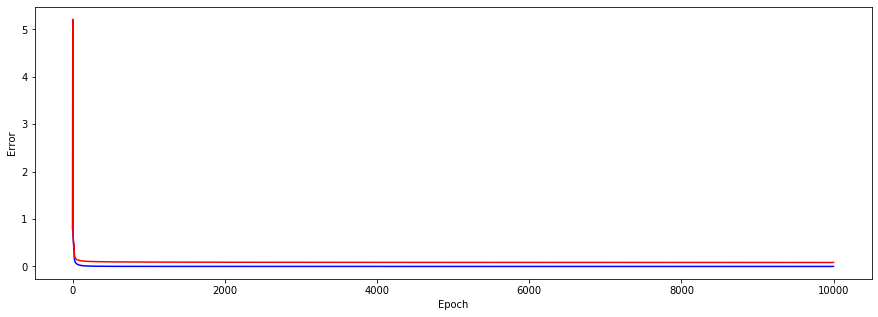

45
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.001887
Cost after iteration 1000: 0.000789
Cost after iteration 1500: 0.000484
Cost after iteration 2000: 0.000345
Cost after iteration 2500: 0.000266
Cost after iteration 3000: 0.000215
Cost after iteration 3500: 0.000180
Cost after iteration 4000: 0.000155
Cost after iteration 4500: 0.000136
Cost after iteration 5000: 0.000120
Cost after iteration 5500: 0.000108
Cost after iteration 6000: 0.000098
Cost after iteration 6500: 0.000090
Cost after iteration 7000: 0.000082
Cost after iteration 7500: 0.000076
Cost after iteration 8000: 0.000071
Cost after iteration 8500: 0.000066
Cost after iteration 9000: 0.000062
Cost after iteration 9500: 0.000059


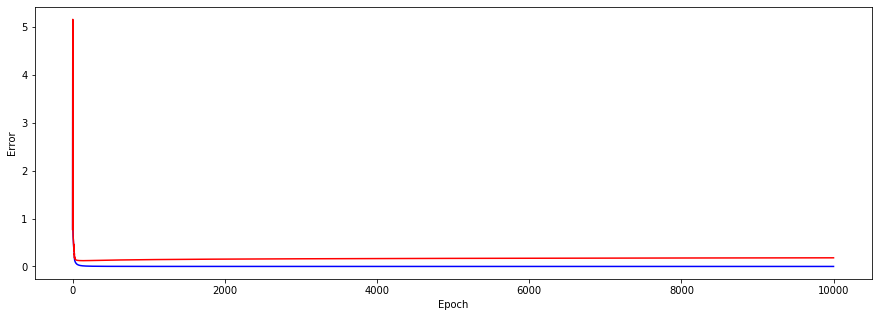

45
Cost after iteration 0: 0.782640
Cost after iteration 500: 0.001980
Cost after iteration 1000: 0.000830
Cost after iteration 1500: 0.000510
Cost after iteration 2000: 0.000364
Cost after iteration 2500: 0.000281
Cost after iteration 3000: 0.000227
Cost after iteration 3500: 0.000191
Cost after iteration 4000: 0.000164
Cost after iteration 4500: 0.000143
Cost after iteration 5000: 0.000127
Cost after iteration 5500: 0.000114
Cost after iteration 6000: 0.000103
Cost after iteration 6500: 0.000095
Cost after iteration 7000: 0.000087
Cost after iteration 7500: 0.000081
Cost after iteration 8000: 0.000075
Cost after iteration 8500: 0.000070
Cost after iteration 9000: 0.000066
Cost after iteration 9500: 0.000062


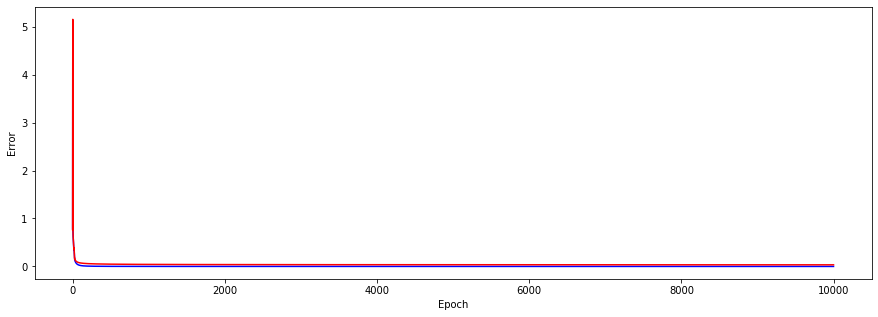

45
Cost after iteration 0: 0.779123
Cost after iteration 500: 0.001993
Cost after iteration 1000: 0.000830
Cost after iteration 1500: 0.000507
Cost after iteration 2000: 0.000359
Cost after iteration 2500: 0.000276
Cost after iteration 3000: 0.000223
Cost after iteration 3500: 0.000186
Cost after iteration 4000: 0.000160
Cost after iteration 4500: 0.000139
Cost after iteration 5000: 0.000123
Cost after iteration 5500: 0.000111
Cost after iteration 6000: 0.000100
Cost after iteration 6500: 0.000091
Cost after iteration 7000: 0.000084
Cost after iteration 7500: 0.000078
Cost after iteration 8000: 0.000072
Cost after iteration 8500: 0.000067
Cost after iteration 9000: 0.000063
Cost after iteration 9500: 0.000059


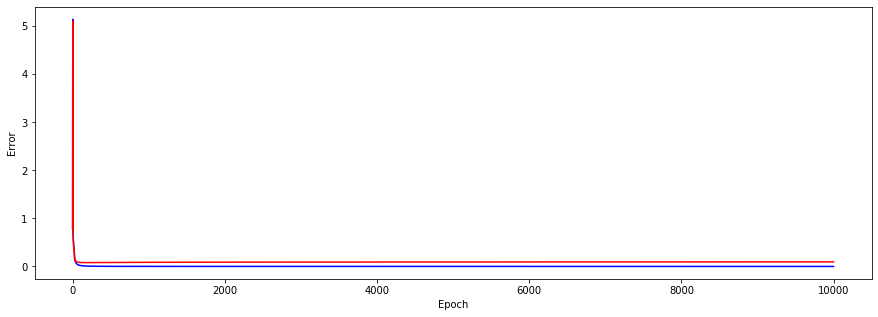

50
Cost after iteration 0: 0.695499
Cost after iteration 500: 0.002707
Cost after iteration 1000: 0.001035
Cost after iteration 1500: 0.000607
Cost after iteration 2000: 0.000420
Cost after iteration 2500: 0.000318
Cost after iteration 3000: 0.000254
Cost after iteration 3500: 0.000210
Cost after iteration 4000: 0.000179
Cost after iteration 4500: 0.000155
Cost after iteration 5000: 0.000137
Cost after iteration 5500: 0.000122
Cost after iteration 6000: 0.000110
Cost after iteration 6500: 0.000100
Cost after iteration 7000: 0.000092
Cost after iteration 7500: 0.000085
Cost after iteration 8000: 0.000079
Cost after iteration 8500: 0.000073
Cost after iteration 9000: 0.000069
Cost after iteration 9500: 0.000064


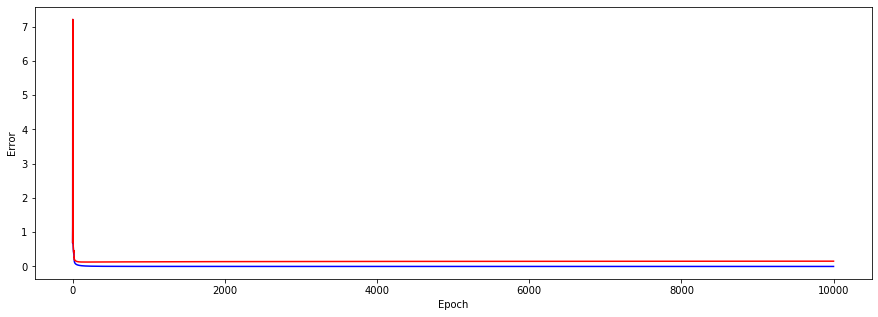

50
Cost after iteration 0: 0.698983
Cost after iteration 500: 0.002030
Cost after iteration 1000: 0.000832
Cost after iteration 1500: 0.000507
Cost after iteration 2000: 0.000359
Cost after iteration 2500: 0.000276
Cost after iteration 3000: 0.000224
Cost after iteration 3500: 0.000187
Cost after iteration 4000: 0.000160
Cost after iteration 4500: 0.000140
Cost after iteration 5000: 0.000124
Cost after iteration 5500: 0.000111
Cost after iteration 6000: 0.000101
Cost after iteration 6500: 0.000092
Cost after iteration 7000: 0.000085
Cost after iteration 7500: 0.000079
Cost after iteration 8000: 0.000073
Cost after iteration 8500: 0.000068
Cost after iteration 9000: 0.000064
Cost after iteration 9500: 0.000060


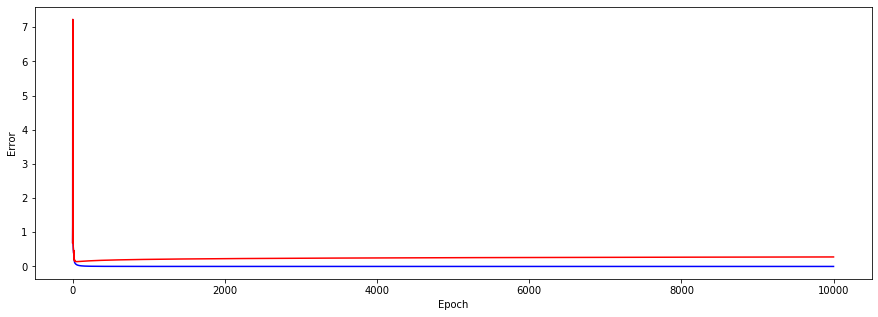

50
Cost after iteration 0: 0.699138
Cost after iteration 500: 0.002042
Cost after iteration 1000: 0.000841
Cost after iteration 1500: 0.000514
Cost after iteration 2000: 0.000366
Cost after iteration 2500: 0.000282
Cost after iteration 3000: 0.000229
Cost after iteration 3500: 0.000192
Cost after iteration 4000: 0.000164
Cost after iteration 4500: 0.000144
Cost after iteration 5000: 0.000128
Cost after iteration 5500: 0.000115
Cost after iteration 6000: 0.000104
Cost after iteration 6500: 0.000095
Cost after iteration 7000: 0.000088
Cost after iteration 7500: 0.000081
Cost after iteration 8000: 0.000075
Cost after iteration 8500: 0.000071
Cost after iteration 9000: 0.000066
Cost after iteration 9500: 0.000062


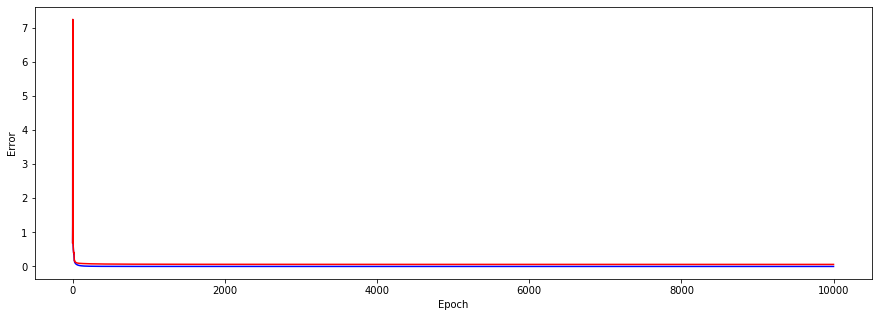

50
Cost after iteration 0: 0.697058
Cost after iteration 500: 0.001948
Cost after iteration 1000: 0.000810
Cost after iteration 1500: 0.000497
Cost after iteration 2000: 0.000354
Cost after iteration 2500: 0.000273
Cost after iteration 3000: 0.000222
Cost after iteration 3500: 0.000186
Cost after iteration 4000: 0.000160
Cost after iteration 4500: 0.000140
Cost after iteration 5000: 0.000124
Cost after iteration 5500: 0.000111
Cost after iteration 6000: 0.000101
Cost after iteration 6500: 0.000092
Cost after iteration 7000: 0.000085
Cost after iteration 7500: 0.000079
Cost after iteration 8000: 0.000073
Cost after iteration 8500: 0.000069
Cost after iteration 9000: 0.000064
Cost after iteration 9500: 0.000061


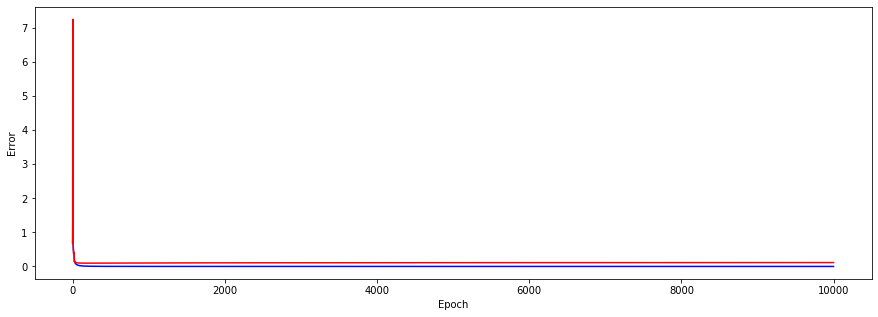

60
Cost after iteration 0: 0.751639
Cost after iteration 500: 0.001923
Cost after iteration 1000: 0.000785
Cost after iteration 1500: 0.000477
Cost after iteration 2000: 0.000338
Cost after iteration 2500: 0.000259
Cost after iteration 3000: 0.000209
Cost after iteration 3500: 0.000175
Cost after iteration 4000: 0.000150
Cost after iteration 4500: 0.000131
Cost after iteration 5000: 0.000116
Cost after iteration 5500: 0.000104
Cost after iteration 6000: 0.000094
Cost after iteration 6500: 0.000086
Cost after iteration 7000: 0.000079
Cost after iteration 7500: 0.000073
Cost after iteration 8000: 0.000068
Cost after iteration 8500: 0.000064
Cost after iteration 9000: 0.000060
Cost after iteration 9500: 0.000056


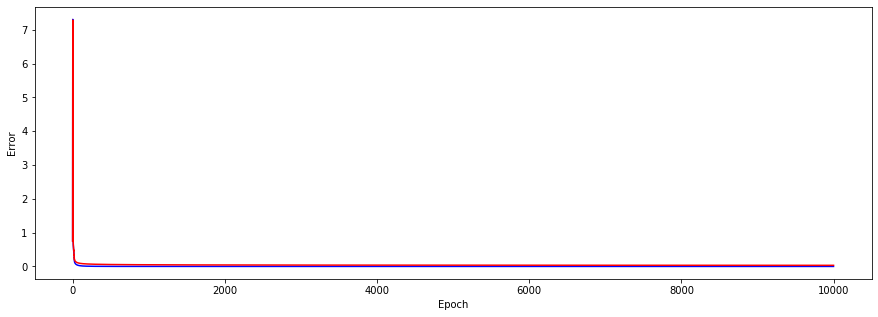

60
Cost after iteration 0: 0.753064
Cost after iteration 500: 0.001648
Cost after iteration 1000: 0.000689
Cost after iteration 1500: 0.000423
Cost after iteration 2000: 0.000301
Cost after iteration 2500: 0.000232
Cost after iteration 3000: 0.000188
Cost after iteration 3500: 0.000158
Cost after iteration 4000: 0.000136
Cost after iteration 4500: 0.000119
Cost after iteration 5000: 0.000105
Cost after iteration 5500: 0.000095
Cost after iteration 6000: 0.000086
Cost after iteration 6500: 0.000078
Cost after iteration 7000: 0.000072
Cost after iteration 7500: 0.000067
Cost after iteration 8000: 0.000062
Cost after iteration 8500: 0.000058
Cost after iteration 9000: 0.000055
Cost after iteration 9500: 0.000051


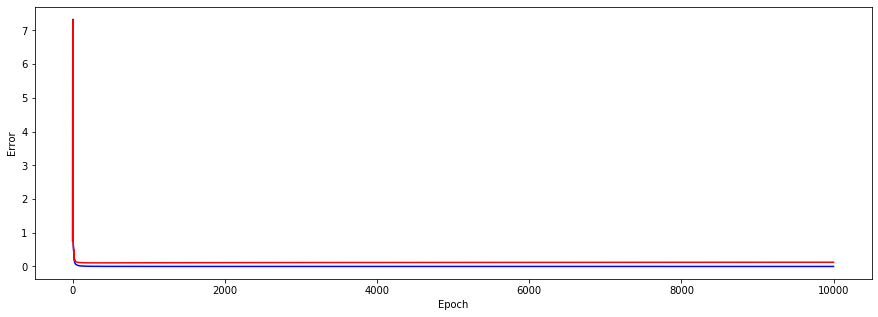

60
Cost after iteration 0: 0.751841
Cost after iteration 500: 0.001751
Cost after iteration 1000: 0.000728
Cost after iteration 1500: 0.000445
Cost after iteration 2000: 0.000317
Cost after iteration 2500: 0.000244
Cost after iteration 3000: 0.000197
Cost after iteration 3500: 0.000165
Cost after iteration 4000: 0.000142
Cost after iteration 4500: 0.000124
Cost after iteration 5000: 0.000110
Cost after iteration 5500: 0.000099
Cost after iteration 6000: 0.000090
Cost after iteration 6500: 0.000082
Cost after iteration 7000: 0.000075
Cost after iteration 7500: 0.000070
Cost after iteration 8000: 0.000065
Cost after iteration 8500: 0.000061
Cost after iteration 9000: 0.000057
Cost after iteration 9500: 0.000054


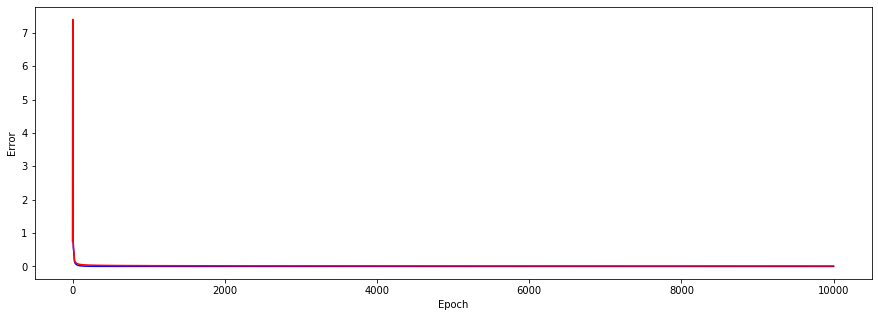

60
Cost after iteration 0: 0.754090
Cost after iteration 500: 0.001688
Cost after iteration 1000: 0.000704
Cost after iteration 1500: 0.000431
Cost after iteration 2000: 0.000307
Cost after iteration 2500: 0.000236
Cost after iteration 3000: 0.000191
Cost after iteration 3500: 0.000160
Cost after iteration 4000: 0.000138
Cost after iteration 4500: 0.000120
Cost after iteration 5000: 0.000107
Cost after iteration 5500: 0.000096
Cost after iteration 6000: 0.000087
Cost after iteration 6500: 0.000079
Cost after iteration 7000: 0.000073
Cost after iteration 7500: 0.000068
Cost after iteration 8000: 0.000063
Cost after iteration 8500: 0.000059
Cost after iteration 9000: 0.000055
Cost after iteration 9500: 0.000052


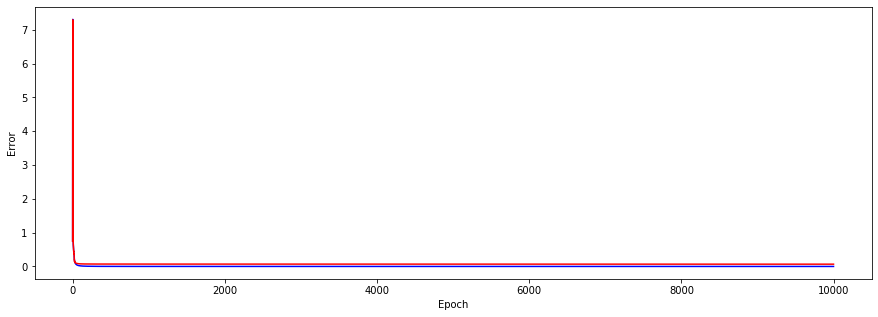

65
Cost after iteration 0: 0.757299
Cost after iteration 500: 0.002236
Cost after iteration 1000: 0.000861
Cost after iteration 1500: 0.000509
Cost after iteration 2000: 0.000354
Cost after iteration 2500: 0.000269
Cost after iteration 3000: 0.000216
Cost after iteration 3500: 0.000180
Cost after iteration 4000: 0.000153
Cost after iteration 4500: 0.000133
Cost after iteration 5000: 0.000118
Cost after iteration 5500: 0.000105
Cost after iteration 6000: 0.000095
Cost after iteration 6500: 0.000087
Cost after iteration 7000: 0.000080
Cost after iteration 7500: 0.000074
Cost after iteration 8000: 0.000068
Cost after iteration 8500: 0.000064
Cost after iteration 9000: 0.000060
Cost after iteration 9500: 0.000056


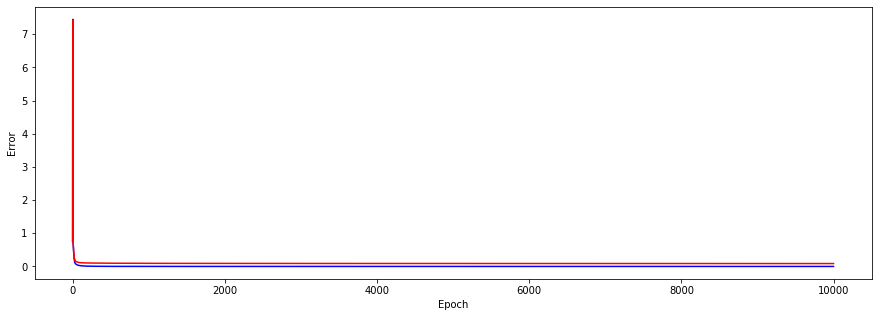

65
Cost after iteration 0: 0.757112
Cost after iteration 500: 0.002042
Cost after iteration 1000: 0.000814
Cost after iteration 1500: 0.000486
Cost after iteration 2000: 0.000340
Cost after iteration 2500: 0.000259
Cost after iteration 3000: 0.000208
Cost after iteration 3500: 0.000173
Cost after iteration 4000: 0.000147
Cost after iteration 4500: 0.000128
Cost after iteration 5000: 0.000113
Cost after iteration 5500: 0.000101
Cost after iteration 6000: 0.000092
Cost after iteration 6500: 0.000083
Cost after iteration 7000: 0.000077
Cost after iteration 7500: 0.000071
Cost after iteration 8000: 0.000066
Cost after iteration 8500: 0.000061
Cost after iteration 9000: 0.000057
Cost after iteration 9500: 0.000054


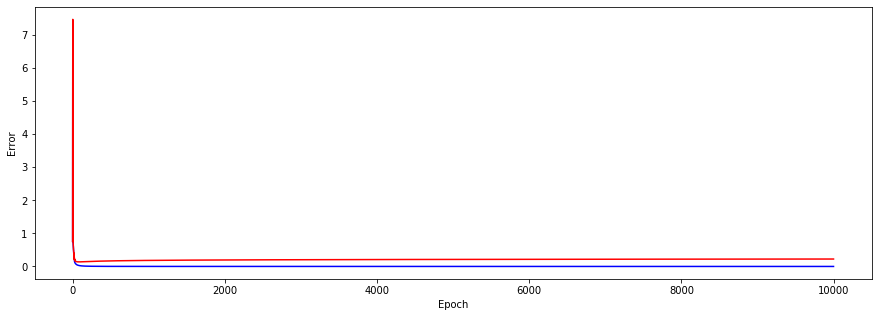

65
Cost after iteration 0: 0.757635
Cost after iteration 500: 0.002152
Cost after iteration 1000: 0.000867
Cost after iteration 1500: 0.000520
Cost after iteration 2000: 0.000364
Cost after iteration 2500: 0.000278
Cost after iteration 3000: 0.000223
Cost after iteration 3500: 0.000186
Cost after iteration 4000: 0.000158
Cost after iteration 4500: 0.000138
Cost after iteration 5000: 0.000122
Cost after iteration 5500: 0.000109
Cost after iteration 6000: 0.000098
Cost after iteration 6500: 0.000090
Cost after iteration 7000: 0.000082
Cost after iteration 7500: 0.000076
Cost after iteration 8000: 0.000071
Cost after iteration 8500: 0.000066
Cost after iteration 9000: 0.000062
Cost after iteration 9500: 0.000058


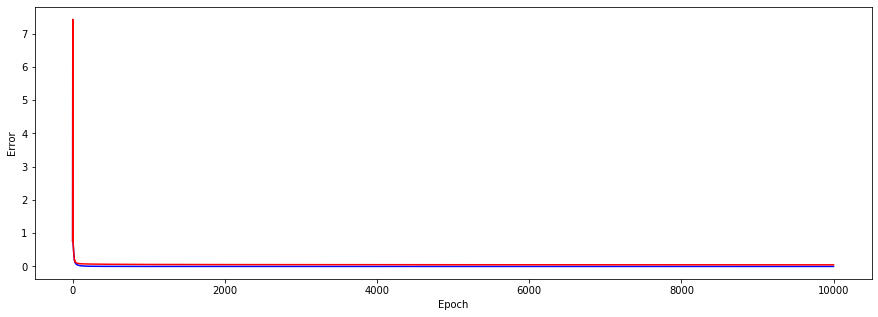

65
Cost after iteration 0: 0.757155
Cost after iteration 500: 0.001950
Cost after iteration 1000: 0.000787
Cost after iteration 1500: 0.000475
Cost after iteration 2000: 0.000335
Cost after iteration 2500: 0.000256
Cost after iteration 3000: 0.000206
Cost after iteration 3500: 0.000172
Cost after iteration 4000: 0.000147
Cost after iteration 4500: 0.000128
Cost after iteration 5000: 0.000114
Cost after iteration 5500: 0.000102
Cost after iteration 6000: 0.000092
Cost after iteration 6500: 0.000084
Cost after iteration 7000: 0.000077
Cost after iteration 7500: 0.000071
Cost after iteration 8000: 0.000066
Cost after iteration 8500: 0.000062
Cost after iteration 9000: 0.000058
Cost after iteration 9500: 0.000054


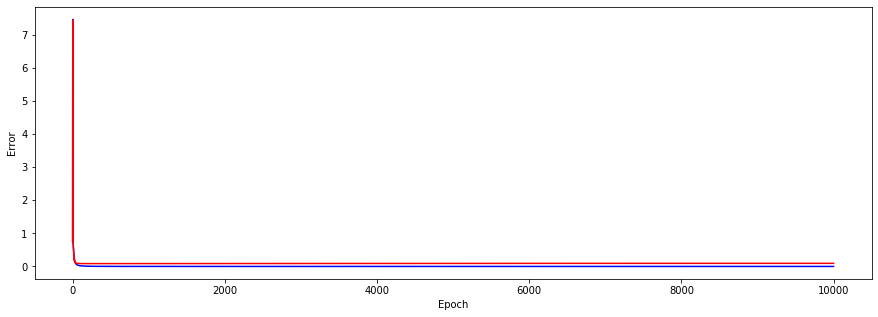

70
Cost after iteration 0: 0.697868
Cost after iteration 500: 0.002131
Cost after iteration 1000: 0.000845
Cost after iteration 1500: 0.000505
Cost after iteration 2000: 0.000353
Cost after iteration 2500: 0.000269
Cost after iteration 3000: 0.000216
Cost after iteration 3500: 0.000180
Cost after iteration 4000: 0.000153
Cost after iteration 4500: 0.000133
Cost after iteration 5000: 0.000118
Cost after iteration 5500: 0.000106
Cost after iteration 6000: 0.000095
Cost after iteration 6500: 0.000087
Cost after iteration 7000: 0.000080
Cost after iteration 7500: 0.000074
Cost after iteration 8000: 0.000068
Cost after iteration 8500: 0.000064
Cost after iteration 9000: 0.000060
Cost after iteration 9500: 0.000056


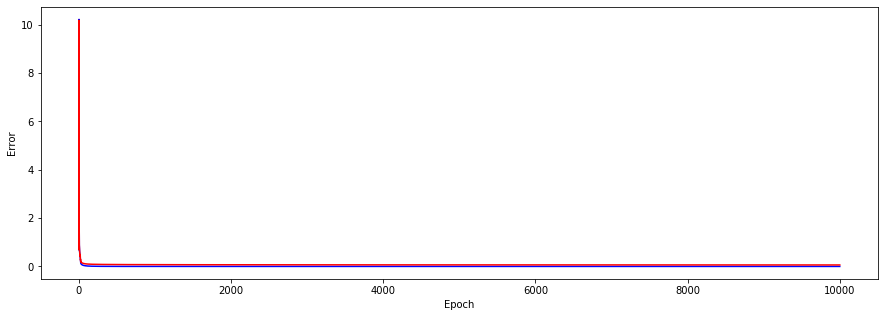

70
Cost after iteration 0: 0.699715
Cost after iteration 500: 0.001844
Cost after iteration 1000: 0.000751
Cost after iteration 1500: 0.000454
Cost after iteration 2000: 0.000321
Cost after iteration 2500: 0.000246
Cost after iteration 3000: 0.000198
Cost after iteration 3500: 0.000165
Cost after iteration 4000: 0.000141
Cost after iteration 4500: 0.000123
Cost after iteration 5000: 0.000109
Cost after iteration 5500: 0.000098
Cost after iteration 6000: 0.000088
Cost after iteration 6500: 0.000081
Cost after iteration 7000: 0.000074
Cost after iteration 7500: 0.000068
Cost after iteration 8000: 0.000064
Cost after iteration 8500: 0.000059
Cost after iteration 9000: 0.000056
Cost after iteration 9500: 0.000052


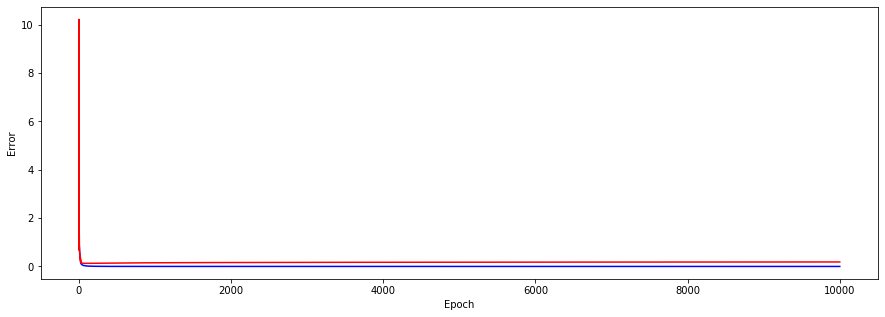

70
Cost after iteration 0: 0.699824
Cost after iteration 500: 0.001934
Cost after iteration 1000: 0.000800
Cost after iteration 1500: 0.000487
Cost after iteration 2000: 0.000345
Cost after iteration 2500: 0.000265
Cost after iteration 3000: 0.000214
Cost after iteration 3500: 0.000178
Cost after iteration 4000: 0.000153
Cost after iteration 4500: 0.000133
Cost after iteration 5000: 0.000118
Cost after iteration 5500: 0.000106
Cost after iteration 6000: 0.000096
Cost after iteration 6500: 0.000088
Cost after iteration 7000: 0.000080
Cost after iteration 7500: 0.000074
Cost after iteration 8000: 0.000069
Cost after iteration 8500: 0.000065
Cost after iteration 9000: 0.000060
Cost after iteration 9500: 0.000057


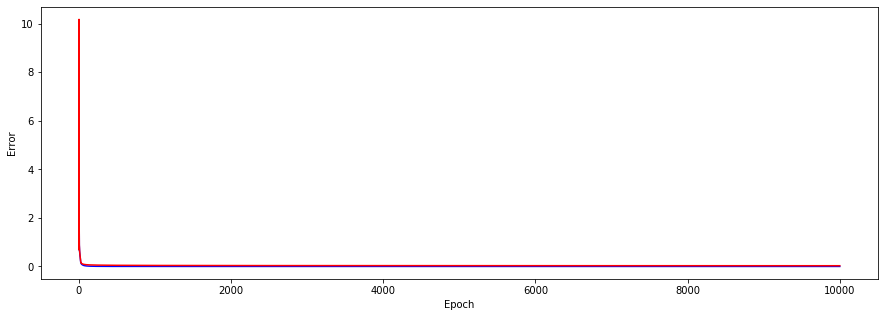

70
Cost after iteration 0: 0.700234
Cost after iteration 500: 0.001885
Cost after iteration 1000: 0.000782
Cost after iteration 1500: 0.000476
Cost after iteration 2000: 0.000337
Cost after iteration 2500: 0.000259
Cost after iteration 3000: 0.000209
Cost after iteration 3500: 0.000174
Cost after iteration 4000: 0.000149
Cost after iteration 4500: 0.000130
Cost after iteration 5000: 0.000115
Cost after iteration 5500: 0.000103
Cost after iteration 6000: 0.000094
Cost after iteration 6500: 0.000085
Cost after iteration 7000: 0.000079
Cost after iteration 7500: 0.000073
Cost after iteration 8000: 0.000067
Cost after iteration 8500: 0.000063
Cost after iteration 9000: 0.000059
Cost after iteration 9500: 0.000056


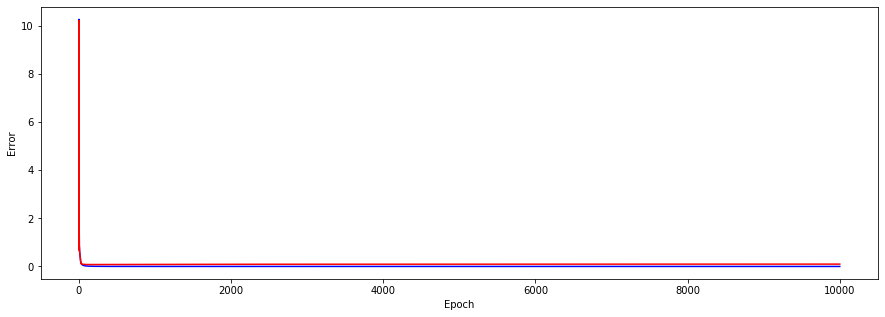

[(45, array([[0.09847419]])),
 (50, array([[0.15122612]])),
 (60, array([[0.05988984]])),
 (65, array([[0.11381161]])),
 (70, array([[0.09359716]]))]

In [502]:
hidden_list = [45,50,60,65,70]
out = []
for hid in hidden_list:
    x = Test.test_NN(k1,k2,k3,k4, output, h=hid)
    out += [(hid,x)]
out

In [110]:
train1 = np.append(k1, k2, axis =0)
train1 = np.append(train1, k3, axis =0)
test1 = k4

train2 = np.append(k1, k2, axis =0)
train2 = np.append(train2, k4, axis =0)
test2 = k3

train3 = np.append(k1, k3, axis =0)
train3 = np.append(train3, k4, axis =0)
test3 = k2

train4 = np.append(k2, k3, axis =0)
train4 = np.append(train4, k4, axis =0)
test4 = k1

k_out = k_out=np.tile([0,1],55)

In [485]:
NN1 = Test.dlnet(train1.T, output.T)
NN1.gd(train1.T, output.T,test1,k_out.reshape(110,1), iter = 10000)
NN2 = Test.dlnet(train2.T, output.T)
NN2.gd(train2.T, output.T,test2,k_out.reshape(110,1), iter = 10000)
NN3 = Test.dlnet(train3.T, output.T)
NN3.gd(train3.T, output.T,test3,k_out.reshape(110,1), iter = 10000)
NN4 = Test.dlnet(train4.T, output.T)
NN4.gd(train4.T, output.T,test4,k_out.reshape(110,1), iter = 10000)

results = (NN1.test(test1.T, k_out.reshape(110,1).T)[1]+ NN2.test(test2.T, k_out.reshape(110,1).T)[1]+NN3.test(test3.T, k_out.reshape(110,1).T)[1]+NN4.test(test4.T, k_out.reshape(110,1).T)[1])/4

Cost after iteration 0: 0.773492
Cost after iteration 500: 0.004971
Cost after iteration 1000: 0.001790
Cost after iteration 1500: 0.001013
Cost after iteration 2000: 0.000686
Cost after iteration 2500: 0.000511
Cost after iteration 3000: 0.000403
Cost after iteration 3500: 0.000331
Cost after iteration 4000: 0.000279
Cost after iteration 4500: 0.000241
Cost after iteration 5000: 0.000211
Cost after iteration 5500: 0.000188
Cost after iteration 6000: 0.000169
Cost after iteration 6500: 0.000153
Cost after iteration 7000: 0.000140
Cost after iteration 7500: 0.000129
Cost after iteration 8000: 0.000119
Cost after iteration 8500: 0.000111
Cost after iteration 9000: 0.000103
Cost after iteration 9500: 0.000097
Cost after iteration 0: 0.780412
Cost after iteration 500: 0.003759
Cost after iteration 1000: 0.001457
Cost after iteration 1500: 0.000861
Cost after iteration 2000: 0.000599
Cost after iteration 2500: 0.000454
Cost after iteration 3000: 0.000363
Cost after iteration 3500: 0.000301


In [486]:
results

array([[0.17357719]])

In [442]:
train.shape

(330, 68)

In [443]:
output=np.tile([0,1],165)
output=output.reshape(330,1)
output.shape

(330, 1)

In [141]:
NN = Test.dlnet(train1.T, output.T)

60


In [153]:
NN.gd(train1.T, output.T, Future, Future_output, iter = 3000)

Cost after iteration 0: 0.753634
Cost after iteration 500: 0.004326
Cost after iteration 1000: 0.001643
Cost after iteration 1500: 0.000973
Cost after iteration 2000: 0.000681
Cost after iteration 2500: 0.000520


In [147]:
len(NN.epoch_list)
len(NN.error_history)
len(NN.error_test)

3000

In [151]:
NN.test(Future.T, Future_output.T)

(array([[4.86522194e-05, 2.06329324e-05, 3.38776421e-05, 1.19205391e-04,
         4.58574343e-04, 9.90001017e-04, 2.38424550e-01, 2.74672219e-04,
         5.09674182e-03, 3.60975452e-02, 4.62100584e-05, 8.27850049e-06,
         9.18226147e-03, 3.82519368e-05, 1.91841129e-02, 3.33318081e-05,
         2.43323257e-03, 6.49578956e-05, 3.82305928e-04, 1.90694559e-04,
         5.50291718e-05, 1.34147212e-05, 5.97177004e-05, 4.52977399e-04,
         1.72748998e-04, 5.60251400e-05, 8.26024526e-05, 1.50134339e-03,
         2.16506822e-05, 5.31577535e-04, 1.35545718e-05, 2.90356206e-04,
         7.63278813e-06, 1.65231297e-04, 2.05572047e-05, 2.51289592e-04,
         4.67012987e-05, 1.03654379e-03, 2.99167788e-04, 1.00361550e-03,
         1.74895536e-05, 3.01746107e-04, 4.65183059e-04, 6.22582121e-05,
         1.25544065e-02, 2.73710369e-03, 6.81258143e-04, 5.71798849e-02,
         5.18308691e-05, 1.60796651e-04, 1.17862627e-04, 1.72771227e-04,
         6.70284297e-04, 1.29759321e-04, 9.99999996

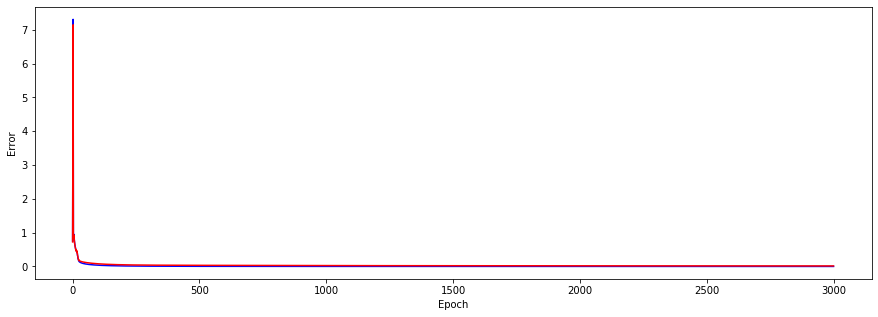

In [447]:
k_out=np.tile([0,1],55)


In [448]:
NN.test(k4.T, k_out.reshape(110,1).T)

(array([[2.30846078e-05, 9.99915584e-01, 1.68925110e-06, 1.00000000e+00,
         2.53603854e-06, 5.21702914e-01, 1.08015314e-05, 1.00000000e+00,
         1.80017401e-05, 9.99998005e-01, 3.17993652e-07, 9.99999952e-01,
         6.32580050e-06, 9.99973161e-01, 5.02449066e-07, 1.00000000e+00,
         2.53227800e-06, 1.00000000e+00, 1.26111879e-06, 9.99187792e-01,
         1.68806665e-05, 4.87872798e-03, 1.44520337e-08, 9.99999941e-01,
         3.22448184e-06, 9.92274411e-01, 4.09535898e-03, 9.99994955e-01,
         8.11412742e-05, 1.00000000e+00, 6.08732454e-09, 9.99968576e-01,
         5.92544290e-08, 1.00000000e+00, 4.38162505e-06, 1.00000000e+00,
         5.56035957e-03, 1.00000000e+00, 5.28328487e-07, 9.99999998e-01,
         7.93188223e-06, 1.00000000e+00, 3.59965110e-06, 1.00000000e+00,
         1.16158666e-05, 1.00000000e+00, 2.28427066e-06, 1.00000000e+00,
         9.88385773e-06, 1.00000000e+00, 4.39933365e-08, 9.99935063e-01,
         1.91020319e-04, 1.00000000e+00, 1.52822547

(68, 330)
(45, 68)
(45, 1)
(45, 330)
(1, 45)
(1, 330)
(1, 330)
(1, 330)
